<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/Proyecto_Series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

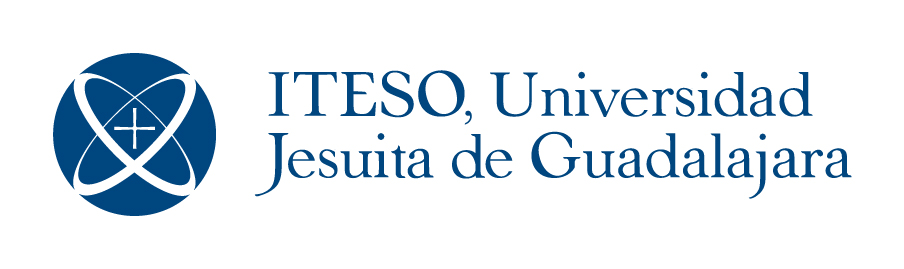

# **SERIES DE TIEMPO**

**Michelle Alejandra Gómez López**  
           
 Fecha: 4 de Septiembre de 2024

 Semestre : Otoño 2024

***Índice***


*   *Introducción*
*   *Objetivo*
*   *Definición del problema*
*   *Descarga y preparación de datos*
*   *Análisis exploratorio*
*   *Estimación a criterio*  
*   *Transformaciones y ajustes*
*   *Modelo*
*   *Evaluación*
*   *Comparación de modelos*
*   *Pronósticos*
*   *Conclusión*
*   *Referencias*

















***Introducción***

Una **serie de tiempo** es una secuencia de datos u observaciones medidos en determinados momentos, en intervalos iguales o desiguales, y ordenados cronológicamente.

  El **análisis de series de tiempo** se refiere al proceso de analizar los datos disponibles para descubrir el patrón o la tendencia en los datos. Permite extraer y modelar las relaciones entre datos a lo largo del tiempo, sea extrapolando (hacia futuro) o interpolando (hacia el pasado) el comportamiento de datos no observados.



Rojas-Jimenez, K. (s. f.). Capítulo 8 Análisis de Series de Tiempo | Ciencia de Datos para Ciencias Naturales. https://bookdown.org/keilor_rojas/CienciaDatos/an%C3%A1lisis-de-series-de-tiempo.html#escogencia-y-ajuste-del-modelo
______________________________________________

***Descripción del Gas Natural (NG=F)***

El gas natural, al igual que el petróleo y el carbón, es un hidrocarburo, es decir, sus integrantes principales son el hidrógeno y el carbono. Nos proporciona electricidad y se puede usar para cocinar y calentar casas, edificios y agua.

El origen del gas y del petróleo es semejante, ya que se formaron de la descomposición o degradación de la materia orgánica; en este caso, de organismos vivos minúsculos o de restos de animales que se acumularon en los fondos oceánicos o en áreas ocupadas por agua.

Los depósitos quedaron atrapados en el interior de la Tierra, en zonas de rocas porosas y permeables que permitieron almacenarlos. El gas, por ser más liviano, quedó en las partes superiores y el petróleo en las bajas.


***Define que pronosticar***

El precio de la acción de la compañía


***Por que es importante analizar y pronosticar en el contexto social***








_________________________________

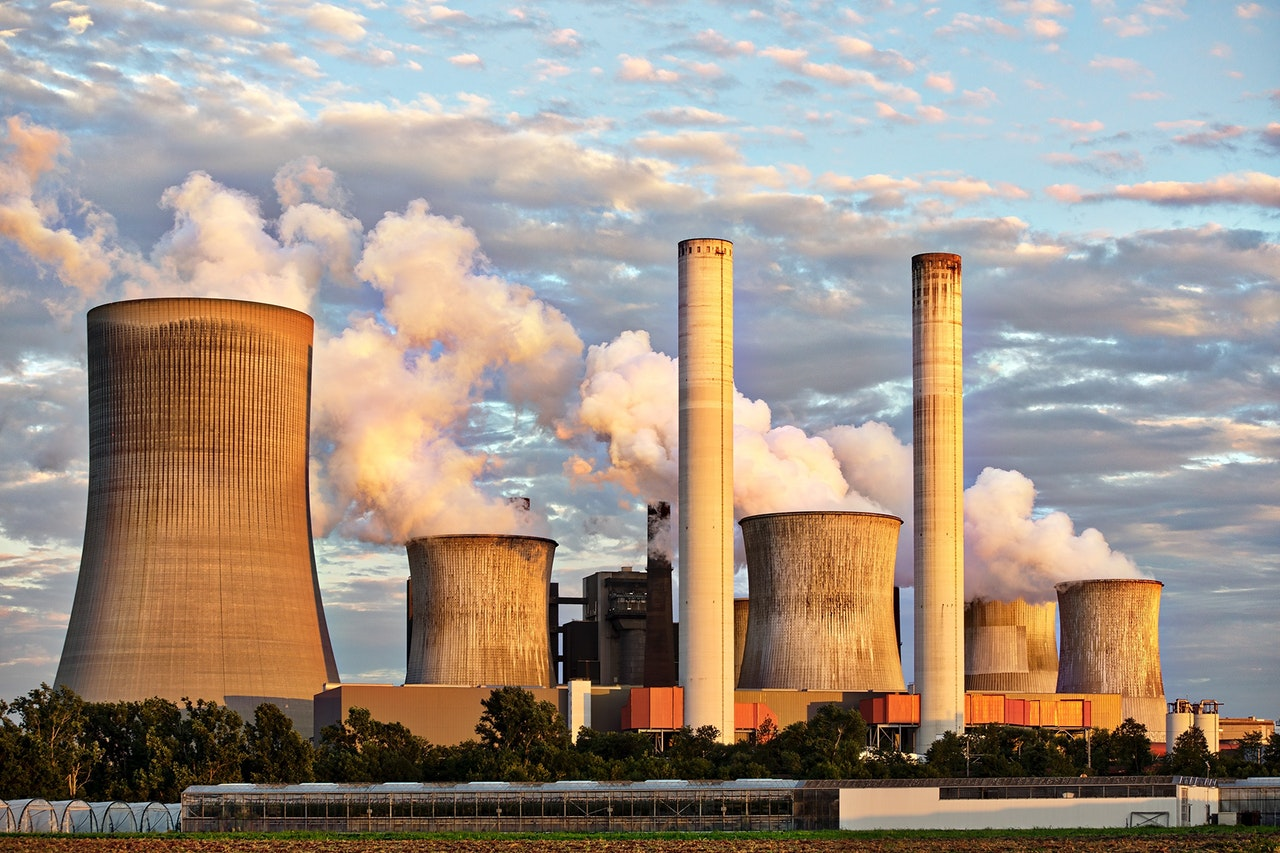

## **Natural Gas**

*Descarga y preparación de datos*
_________________________________


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

In [10]:
dataG = 'NGS'
ticker = yf.Ticker(dataG)
hist = ticker.history(start= '2011-01-01', end= '2023-12-01', interval='1mo')['Close']
hist.index = hist.index.strftime('%Y-%m-%d')
hist.index = pd.to_datetime(hist.index)

hist

,Close
Date,
2011-01-01,17.860001
2011-02-01,19.340000
2011-03-01,17.760000
2011-04-01,18.030001
2011-05-01,18.000000
...,...
2023-07-01,10.290000
2023-08-01,10.860000
2023-09-01,14.560000


In [11]:

hist = hist.groupby(pd.Grouper(freq='M')).last()
hist = pd.Series(hist.values, index = pd.date_range(start=hist.index[0], end=hist.index[-1], freq='1M'))
hist

<ipython-input-11-4341ccfd4781>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hist = hist.groupby(pd.Grouper(freq='M')).last()
<ipython-input-11-4341ccfd4781>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hist = pd.Series(hist.values, index = pd.date_range(start=hist.index[0], end=hist.index[-1], freq='1M'))


,0
2011-01-31,17.860001
2011-02-28,19.340000
2011-03-31,17.760000
2011-04-30,18.030001
2011-05-31,18.000000
...,...
2023-07-31,10.290000
2023-08-31,10.860000
2023-09-30,14.560000
2023-10-31,14.680000


In [12]:
type(hist)

pandas.core.series.Series

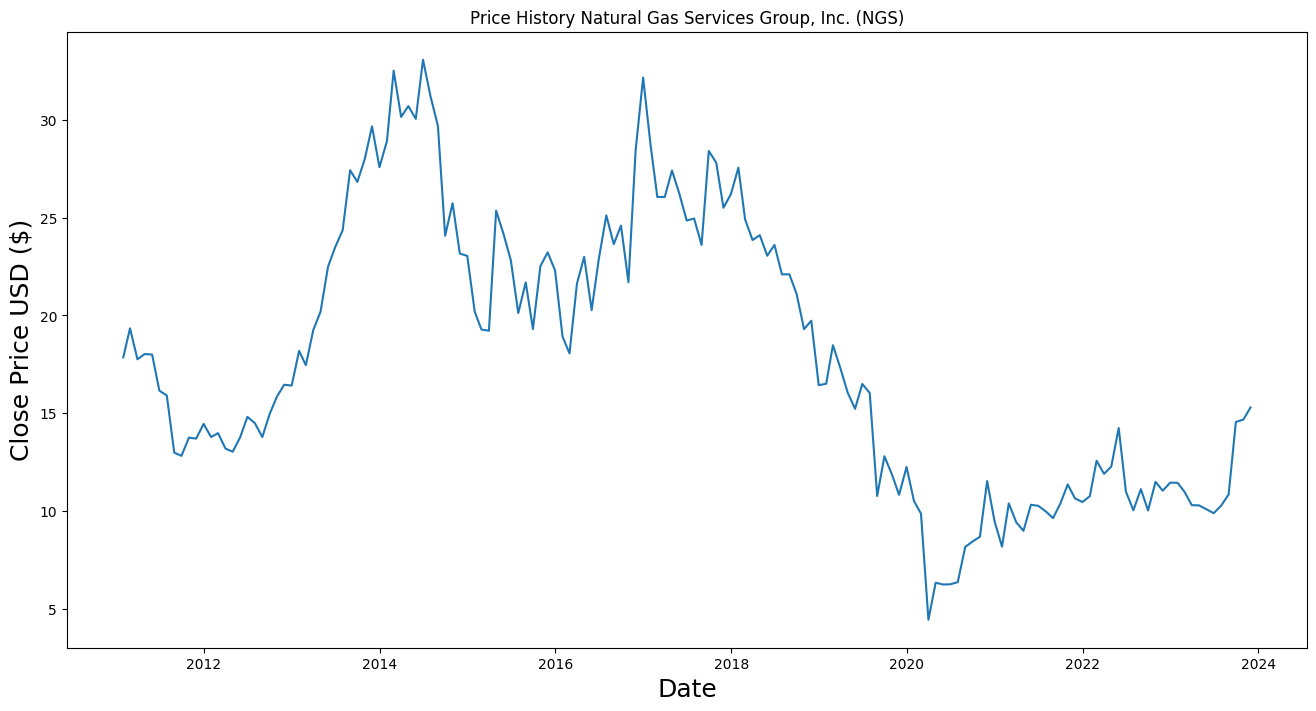

In [13]:
plt.figure(figsize=(16,8))
plt.title('Price History Natural Gas Services Group, Inc. (NGS)')
plt.plot(hist)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [14]:
hist.index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', length=155, freq='ME')

In [15]:

hist.head()

,0
2011-01-31,17.860001
2011-02-28,19.340000
2011-03-31,17.760000
2011-04-30,18.030001
2011-05-31,18.000000


Al separar los datos entre entrenamiento y prueba se puede:

• **Evaluar la generalización:** Permite evaluar cómo se desempeña el modelo en datos no vistos, lo que ayuda a medir su capacidad de generalización.

• **Prevenir el sobreajuste:** Ayuda a identificar si el modelo está sobreajustado a los datos de entrenamiento, lo cual podría llevar a un mal rendimiento en datos reales.

• **Optimizar el modelo:** Permite ajustar los hiperparámetros y realizar selecciones de características de manera más efectiva

In [16]:
training_mask = hist.index > '2022-01-01'
test = hist[training_mask]
train = hist[~training_mask]

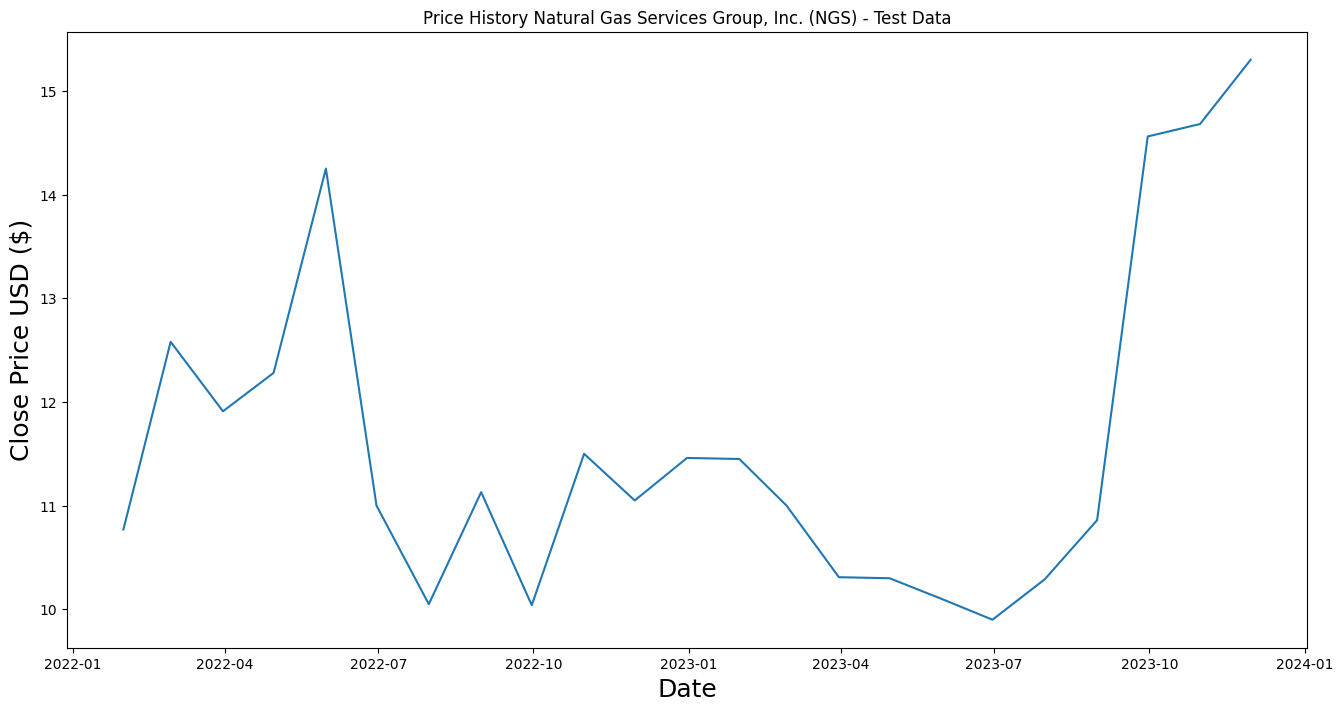

In [17]:
# prompt: graph with the test data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU


plt.figure(figsize=(16,8))
plt.title('Price History Natural Gas Services Group, Inc. (NGS) - Test Data')
plt.plot(test)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


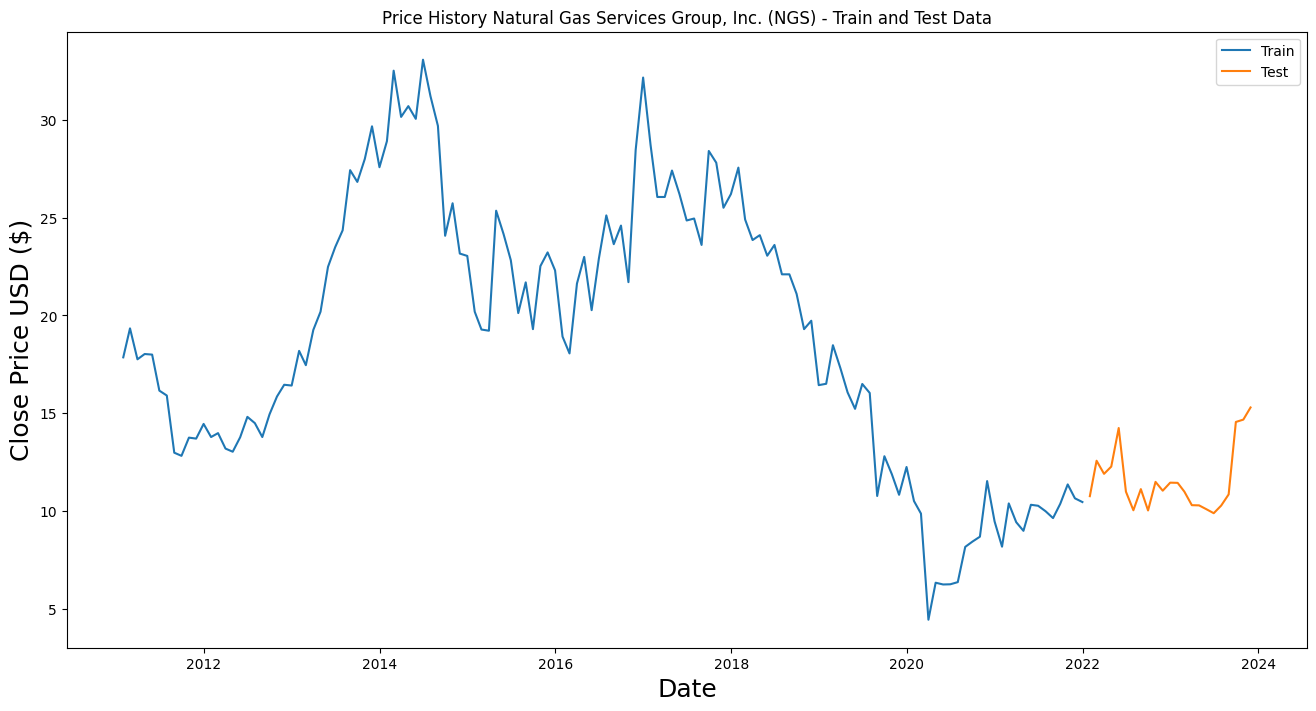

In [18]:
# prompt: graph with train, test  data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU


plt.figure(figsize=(16,8))
plt.title('Price History Natural Gas Services Group, Inc. (NGS) - Train and Test Data')
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()


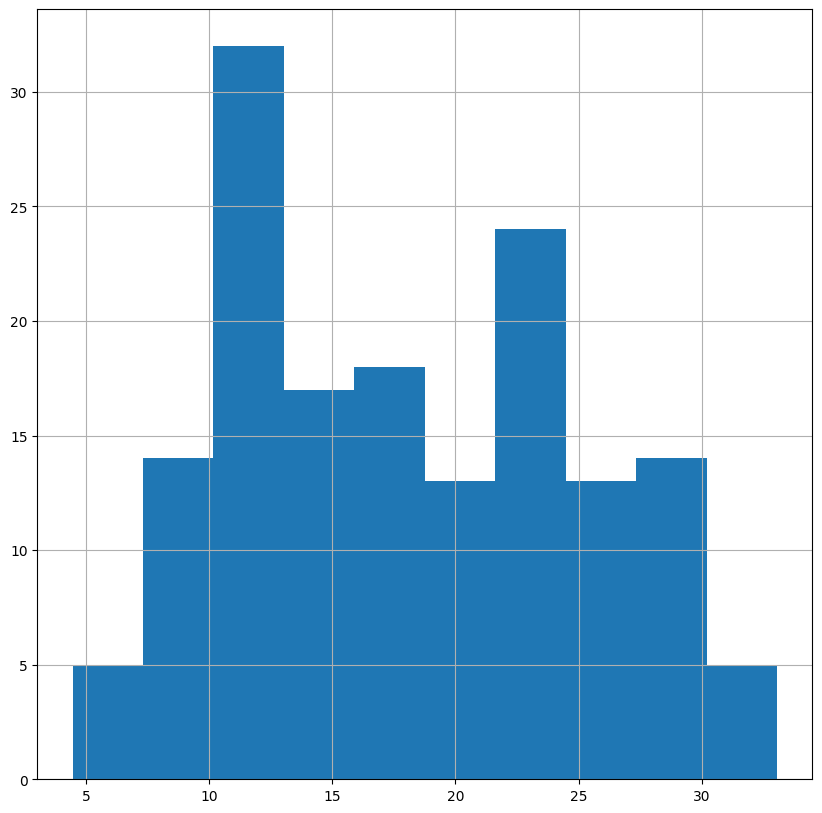

In [19]:
hist.hist(figsize=(10, 10))
plt.show()

<Axes: ylabel='Density'>

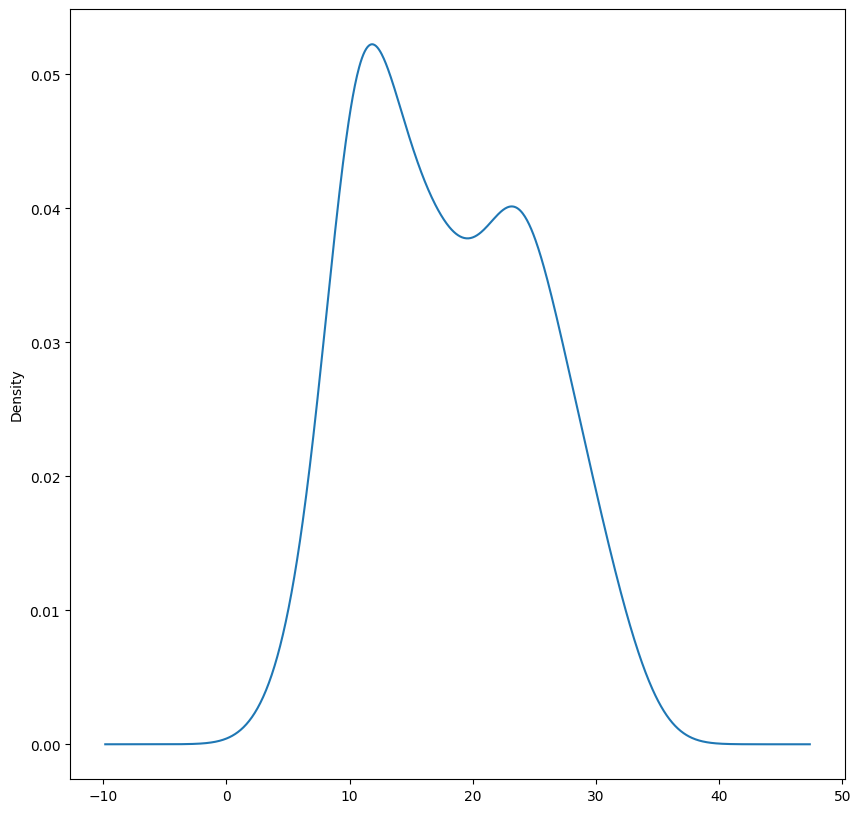

In [20]:
plt.figure(figsize=(10,10))
hist.plot.density()

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot


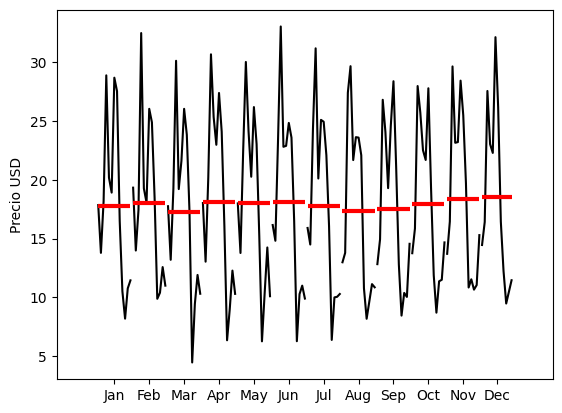

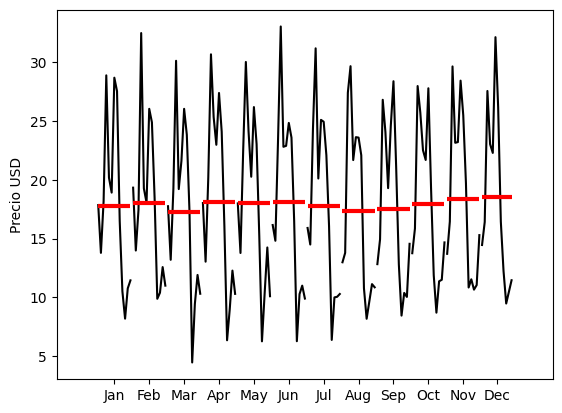

In [22]:
month_plot(hist, ylabel='Precio USD')

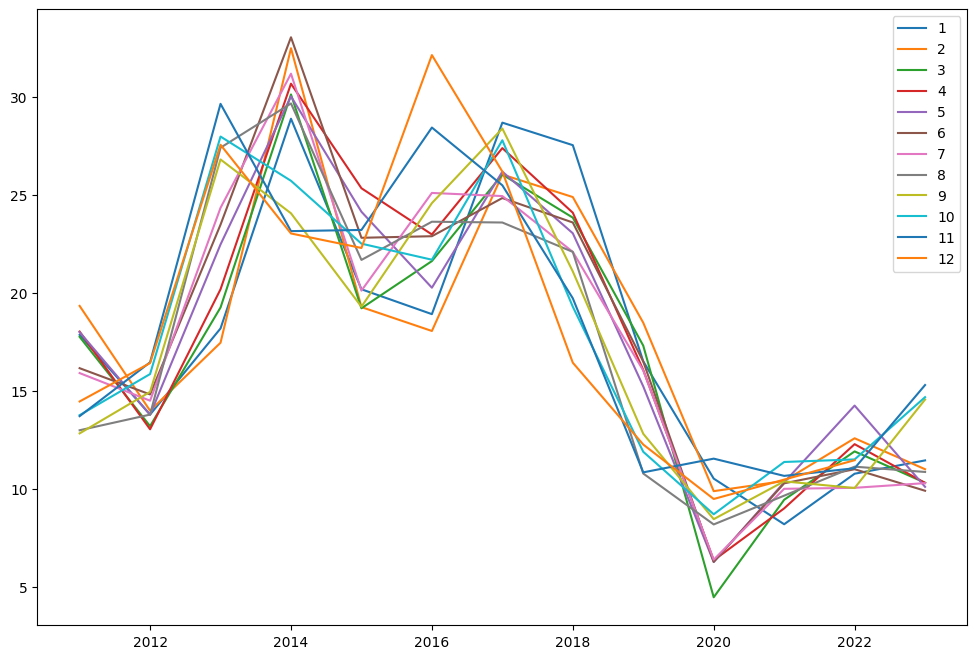

In [23]:
piv_index = getattr(hist.index, 'year')
piv_season = getattr(hist.index, 'month')

piv = pd.pivot_table(data=pd.DataFrame(data=hist.values, index=hist.index, columns=['values']), index=hist.index.year, columns=hist.index.month)
piv.plot(figsize=(12,8))
plt.legend(pd.unique(piv_season))

In [24]:
piv.head()

values                                                         \
             1          2          3          4          5          6    
2011  17.860001  19.340000  17.760000  18.030001  18.000000  16.160000   
2012  13.790000  13.990000  13.200000  13.040000  13.780000  14.820000   
2013  18.190001  17.459999  19.260000  20.190001  22.480000  23.490000   
2014  28.900000  32.500000  30.139999  30.690001  30.040001  33.060001   
2015  20.190001  19.280001  19.219999  25.350000  24.150000  22.820000   

                                                                    
             7          8          9      10         11         12  
2011  15.910000  12.990000  12.830000  13.76  13.710000  14.460000  
2012  14.500000  13.790000  14.950000  15.86  16.459999  16.420000  
2013  24.350000  27.420000  26.820000  27.99  29.660000  27.570000  
2014  31.200001  29.680000  24.070000  25.73  23.160000  23.040001  
2015  20.120001  21.690001  19.299999  22.52  23.219999  22.299999

In [25]:
piv.shape

(13, 12)

([], [])

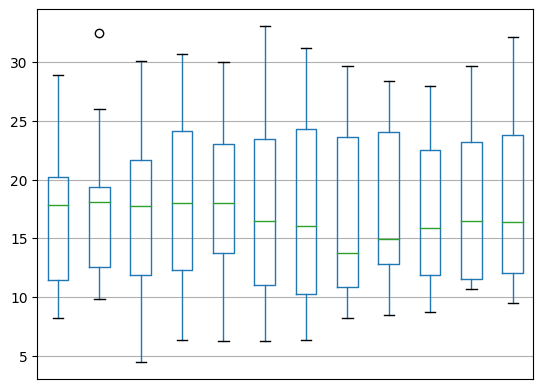

In [26]:

piv.boxplot()
plt.xticks([])


In [27]:
import statsmodels.api as sm

(<Figure size 640x480 with 1 Axes>,
 array([0.58547009, 0.57905983, 0.43696581, 0.2724359 , 0.54166667,
        0.4732906 , 0.33653846, 0.51282051, 0.53739316, 0.19444444,
        0.30021368, 0.45619658, 0.44017094]),
 array([ 0,  1,  4,  8,  7,  5, 11, 12,  2,  6, 10,  3,  9]),
 array([ 2,  3,  6,  9, 10, 11, 12]))

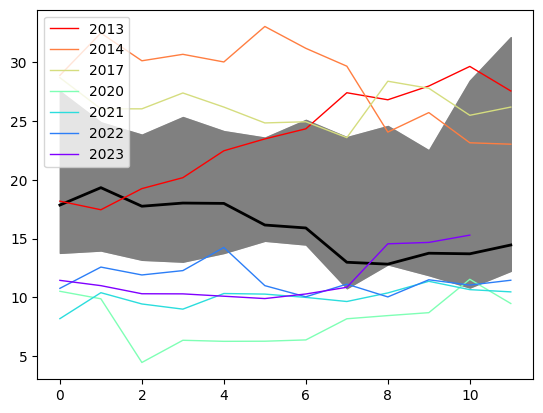

In [28]:
sm.graphics.fboxplot(data=piv, labels=piv.index)


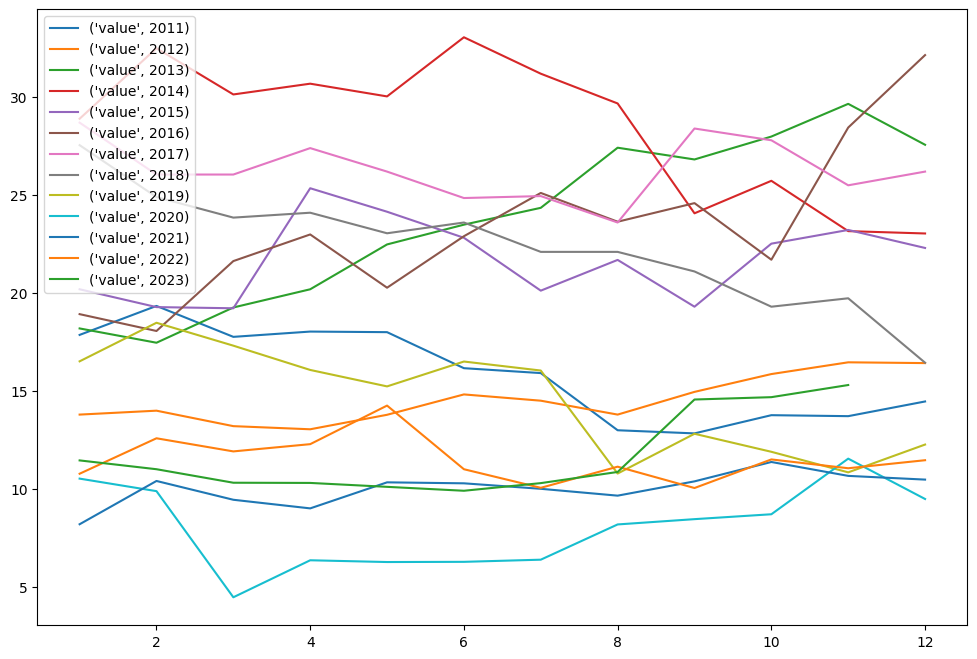

In [29]:
# Ensure 'hist' is a DataFrame
if isinstance(hist, pd.Series):
    # If 'hist' is a Series, convert it to a DataFrame with a single column named 'value'
    hist = hist.to_frame('value')

piv = pd.pivot_table(hist, index=piv_season, columns=piv_index)
# Replace 'labels' with legend labels using the DataFrame's columns
piv.plot(figsize=(12,8), legend = True) # Set legend to True to display labels
plt.legend(piv.columns) # Use DataFrame's columns for legend labels


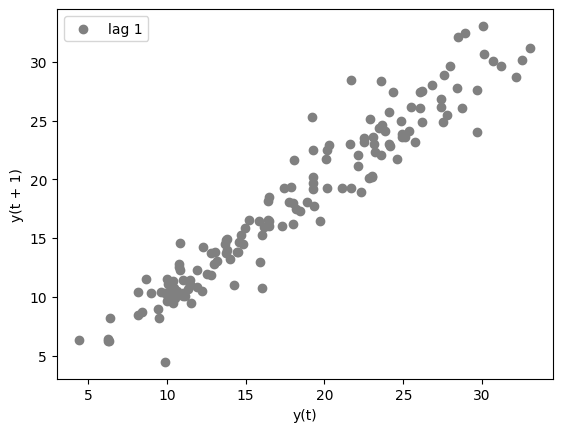

In [30]:
from pandas.plotting import lag_plot
lag_plot(hist, lag=1, c=['grey'], label='lag 1')
plt.legend()

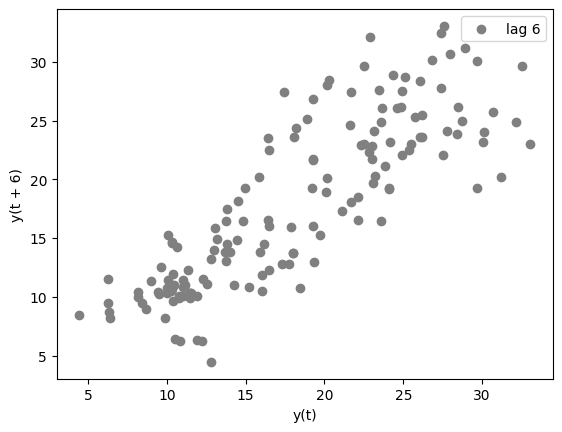

In [31]:
lag_plot(hist, lag=6, c=['grey'], label='lag 6')
plt.legend()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

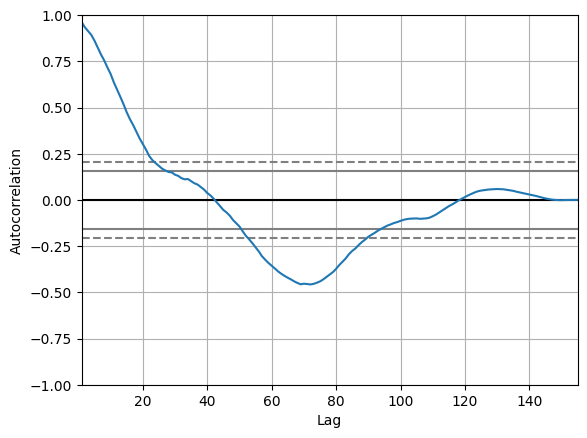

In [32]:
pd.plotting.autocorrelation_plot(hist)


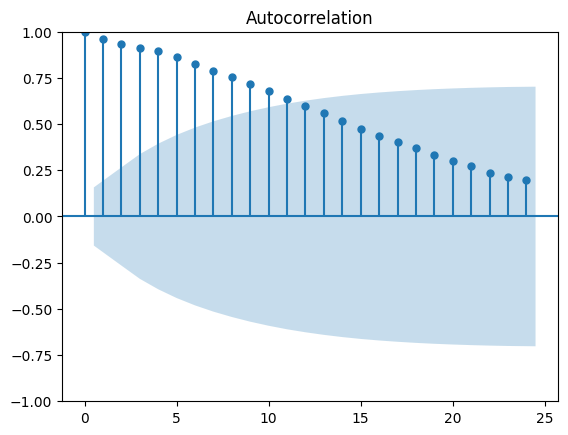

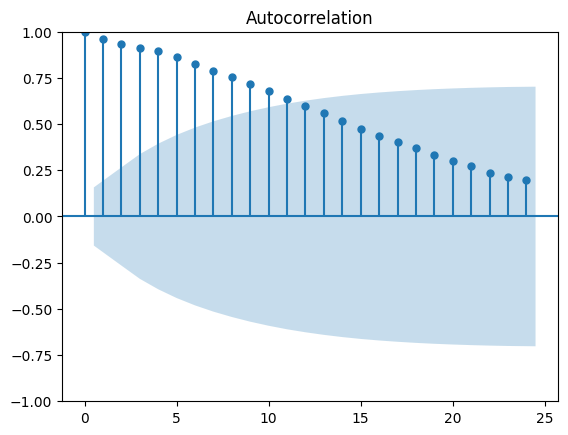

In [33]:
plot_acf(hist, lags=24)

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(hist, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

2011-01-31   NaN
2011-02-28   NaN
2011-03-31   NaN
2011-04-30   NaN
2011-05-31   NaN
              ..
2023-07-31   NaN
2023-08-31   NaN
2023-09-30   NaN
2023-10-31   NaN
2023-11-30   NaN
Freq: ME, Name: trend, Length: 155, dtype: float64
2011-01-31   -0.199954
2011-02-28   -0.098045
2011-03-31   -0.746656
2011-04-30    0.159143
2011-05-31    0.015428
                ...   
2023-07-31    0.082442
2023-08-31   -0.371343
2023-09-30   -0.392350
2023-10-31    0.025358
2023-11-30    0.567962
Freq: ME, Name: seasonal, Length: 155, dtype: float64
2011-01-31   NaN
2011-02-28   NaN
2011-03-31   NaN
2011-04-30   NaN
2011-05-31   NaN
              ..
2023-07-31   NaN
2023-08-31   NaN
2023-09-30   NaN
2023-10-31   NaN
2023-11-30   NaN
Freq: ME, Name: resid, Length: 155, dtype: float64
2011-01-31    17.860001
2011-02-28    19.340000
2011-03-31    17.760000
2011-04-30    18.030001
2011-05-31    18.000000
                ...    
2023-07-31    10.290000
2023-08-31    10.860000
2023-09-30    14.560000
2

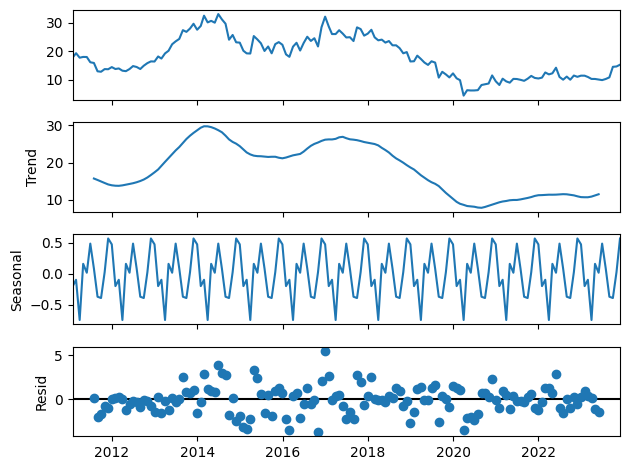

In [35]:
from matplotlib import pyplot
result = seasonal_decompose(hist, model='additive')
result.plot()
pyplot.show()

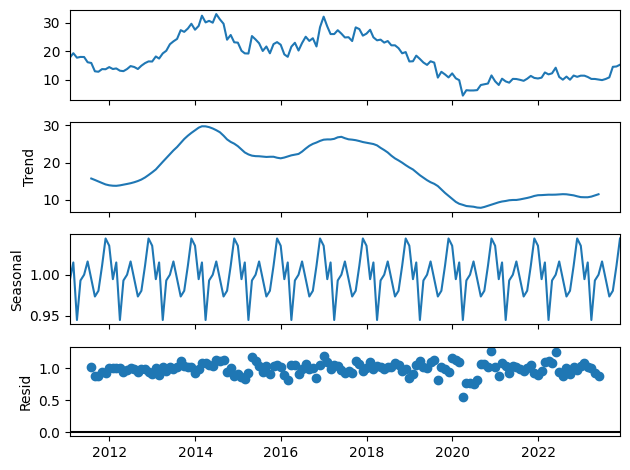

In [36]:
result = seasonal_decompose(hist, model='multiplicative')
result.plot()
pyplot.show()

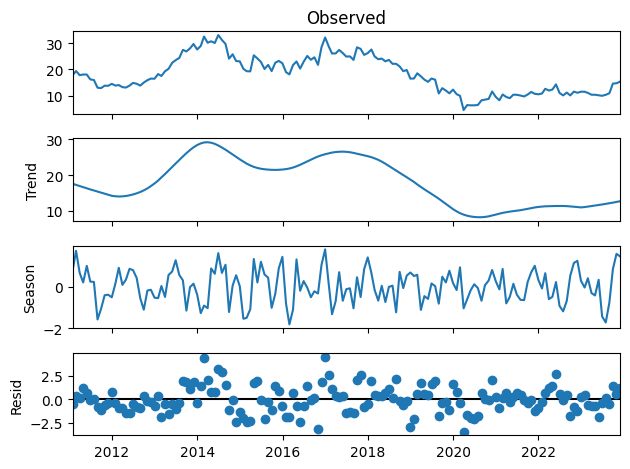

In [37]:
from statsmodels.tsa.seasonal import STL

stl = STL(hist)
res = stl.fit()
fig = res.plot()

In [38]:
hist.describe()

,value
count,155.000000
mean,17.901419
std,6.959241
min,4.460000
25%,11.455000
50%,17.309999
75%,23.600000
max,33.060001


In [39]:
hist.skew()

,0
value,0.247158


#### Al ser un valor positivo sugiere que la distribución de nuestros datos es asimétrica a la derecha (sesgo positiva), sindo un valor cercano a zero se puede considerar que la distribución tiene una asimetría leve.  Afectando estadísticas como la media, que será mayor que la mediana en distribuciones sesgadas positivamente.

In [40]:
hist.kurtosis()

,0
value,-1.029978


#### Sugiere que la distribución es platykurtic, lo que significa que tiene colas más delgadas y una cima más plana en comparación con una distribución normal. Sin la presencia de tantos datos outliers, y al ser negativa puede ser indicativa de una distribución que tiene menos probabilidad de generar valores extremos.

In [67]:
hist.var()

,0
value,48.43104


In [68]:
hist.std()

,0
value,6.959241


array([[<Axes: title={'center': 'value'}>]], dtype=object)

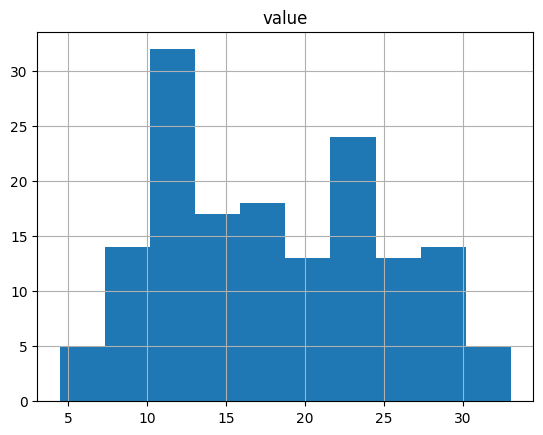

In [41]:
hist.hist()

## **PRONÓSTICOS**

In [42]:
import seaborn as sns
import datetime as dt

In [43]:
test.head()

,0
2022-01-31,10.77
2022-02-28,12.58
2022-03-31,11.91
2022-04-30,12.28
2022-05-31,14.25


In [44]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.5 MB/s eta 0:00:00


In [45]:
# prompt: create an horizaon

horizonte = 3


In [46]:

# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Create an array with the observed values in Bricks:
y_mean = hist.values

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=y_mean)
y_hat_dict = model.predict(h=horizonte)

y_hat_dict

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


{'mean': array([17.90141938, 17.90141938, 17.90141938])}

In [47]:
pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01'], dtype='datetime64[ns]', freq=None)

In [48]:
# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

# Create a dataframe with the quarters and values predicted:
_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)

**Mean forecast (PROMEDIO)**

In [49]:
_pred_df

,mean_forecast
2024-01-01,17.901419
2024-02-01,17.901419
2024-03-01,17.901419


In [50]:
pd.concat([test, _pred_df])

,0,mean_forecast
2022-01-31,10.77,NaN
2022-02-28,12.58,NaN
2022-03-31,11.91,NaN
2022-04-30,12.28,NaN
2022-05-31,14.25,NaN
2022-06-30,11.00,NaN
2022-07-31,10.05,NaN
2022-08-31,11.13,NaN
2022-09-30,10.04,NaN
2022-10-31,11.50,NaN


In [51]:
frame = pd.concat([test, _pred_df])
frame.columns = ['Values', 'mean_forecast']

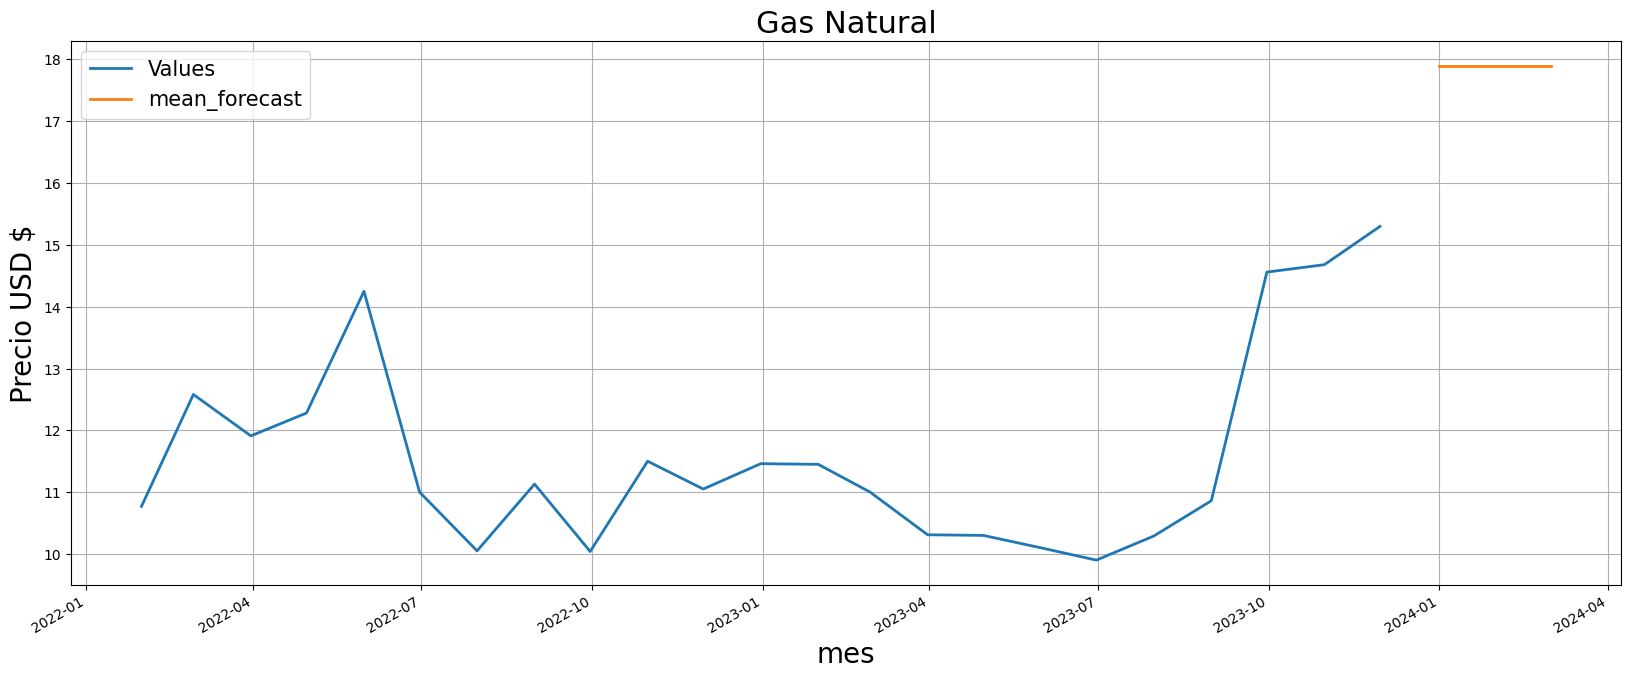

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([test, _pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[['Values', 'mean_forecast']].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Gas Natural', fontsize=22)
ax.set_ylabel('Precio USD $', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()


**Naïve method**


In [53]:
# Naive's usage example:
from statsforecast.models import Naive

# Define the model, fit and predict:
model = Naive()
model = model.fit(y=test.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([15.30000019, 15.30000019, 15.30000019])}

In [54]:
# Create a column with the values predicted:
_pred_df["naive_forecast"] = y_hat_dict["mean"]

In [55]:
_pred_df

,mean_forecast,naive_forecast
2024-01-01,17.901419,15.3
2024-02-01,17.901419,15.3
2024-03-01,17.901419,15.3


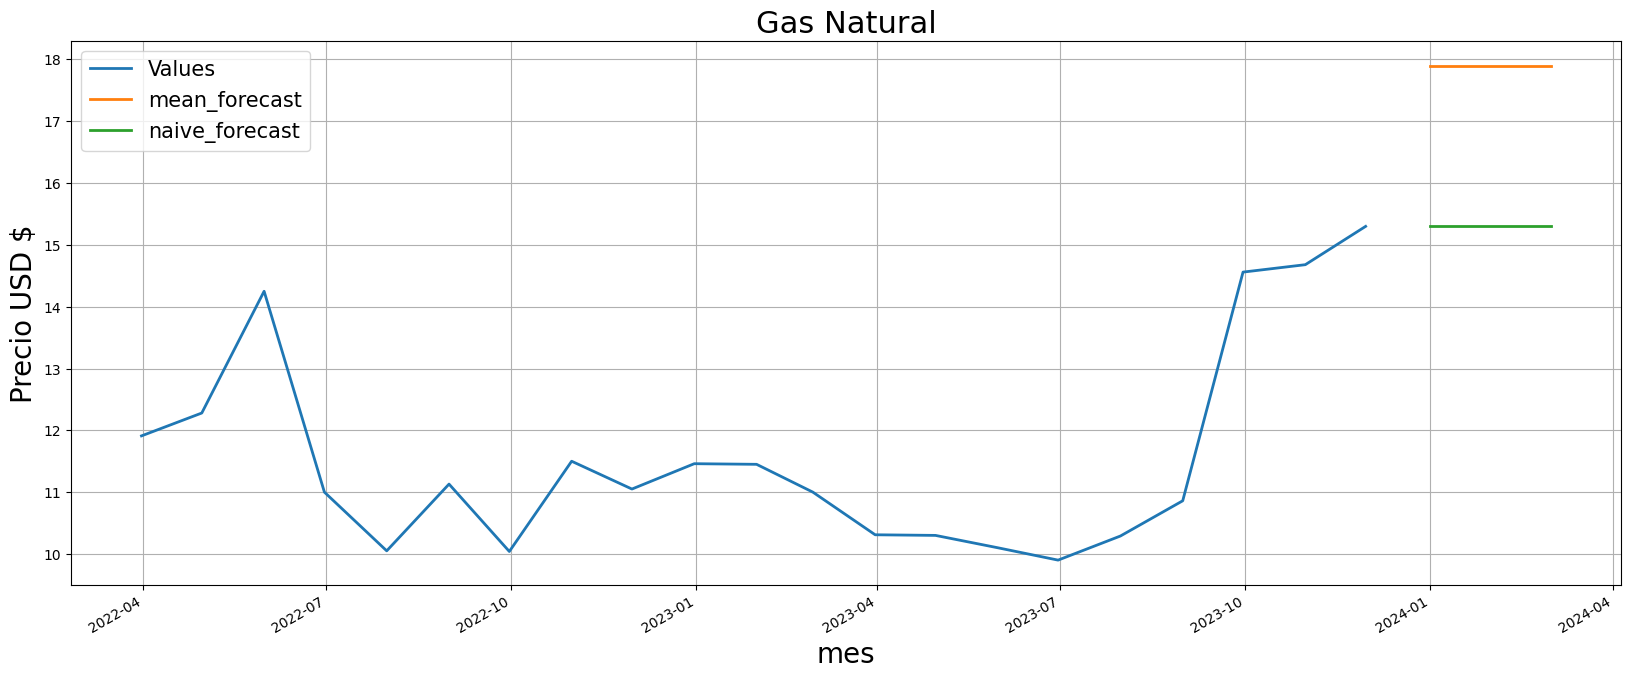

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([test, _pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Gas Natural', fontsize=22)
ax.set_ylabel('Precio USD $', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

**Seasonal naïve method**

In [57]:
# SeasonalNaive's usage example:
from statsforecast.models import SeasonalNaive

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=test.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([11.46000004, 11.44999981, 11.        ])}

In [58]:
# Create a column with the values predicted:
_pred_df["seasonal_naive_forecast"] = y_hat_dict["mean"]


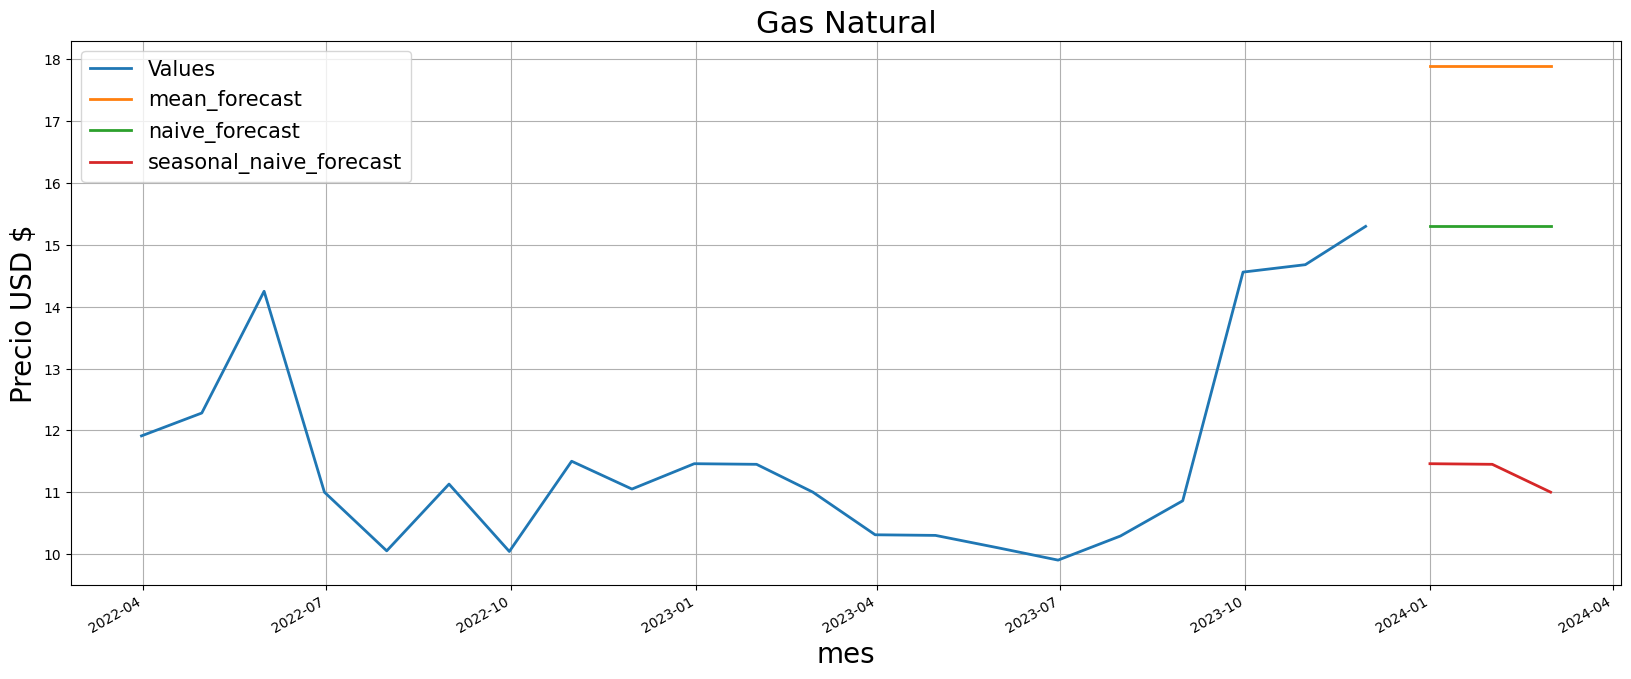

In [59]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([test, _pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Gas Natural', fontsize=22)
ax.set_ylabel('Precio USD $', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

**Drift method**

In [60]:
# RandomWalkWithDrift's usage example:
from statsforecast.models import RandomWalkWithDrift

# Define the model, fit and predict:
model = RandomWalkWithDrift()
model = model.fit(y=test.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([15.50590927, 15.71181835, 15.91772743])}

In [61]:
# Create a column with the values predicted:
_pred_df["drift_forecast"] = y_hat_dict["mean"]

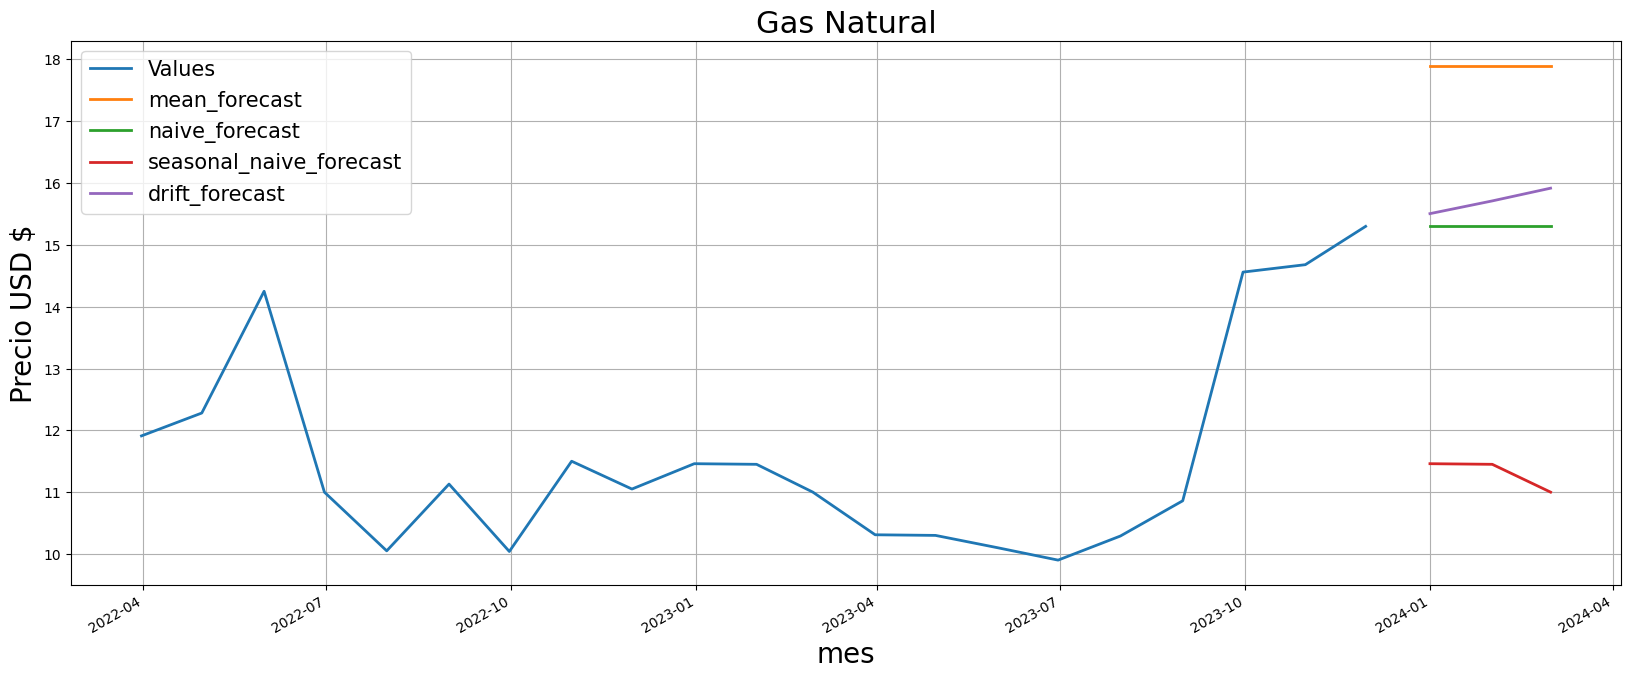

In [62]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([test, _pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast', 'drift_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Gas Natural', fontsize=22)
ax.set_ylabel('Precio USD $', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

**Valores ajustados y residuales**


In [63]:
#Import the libraries that we are going to use for the analysis:
import pandas as pd
import numpy as np

from statsforecast import StatsForecast
from statsforecast.models import __all__
from statsforecast.models import HistoricAverage

DEFINIR EL MODELO ANTES DE model= SeasonalNaive

In [72]:
# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=train.values)
mean = model.predict(h=12)

In [70]:
def augment(model_name, time_var, obs_values):

    type_model_list = []
    for n in range(len(obs_values)):
        type_model_list.append(model_name)
        n += 1
    fitted_values = model.predict_in_sample()
    residuals = obs_values - fitted_values["fitted"]

    augment_df = pd.DataFrame({'model':type_model_list,
                        'time_var':time_var,
                        'obs_values':obs_values,
                        'fitted_values':fitted_values["fitted"],
                        'residuals':residuals})

    return(augment_df)

In [74]:

# augment(model_name, time_var, obs_values)
augment_df = augment("Mean",train.index,train.values)

In [76]:
augment_df.head(24)

,model,time_var,obs_values,fitted_values,residuals
0,Mean,2011-01-31,17.860001,NaN,NaN
1,Mean,2011-02-28,19.340000,NaN,NaN
2,Mean,2011-03-31,17.760000,NaN,NaN
3,Mean,2011-04-30,18.030001,NaN,NaN
4,Mean,2011-05-31,18.000000,NaN,NaN
5,Mean,2011-06-30,16.160000,NaN,NaN
6,Mean,2011-07-31,15.910000,NaN,NaN
7,Mean,2011-08-31,12.990000,NaN,NaN
8,Mean,2011-09-30,12.830000,NaN,NaN
9,Mean,2011-10-31,13.760000,NaN,NaN


In [77]:
augment_df.describe()

,time_var,obs_values,fitted_values,residuals
count,132,132.000000,120.000000,120.000000
mean,2016-07-15 12:43:38.181818112,18.999621,19.898167,-0.588667
min,2011-01-31 00:00:00,4.460000,4.460000,-13.219999
25%,2013-10-23 06:00:00,13.582500,14.917500,-5.800001
50%,2016-07-15 12:00:00,19.270000,20.155001,-1.235001
75%,2019-04-07 12:00:00,24.200000,24.862500,4.025000
max,2021-12-31 00:00:00,33.060001,33.060001,15.040001
std,NaN,6.949911,6.644631,6.630161


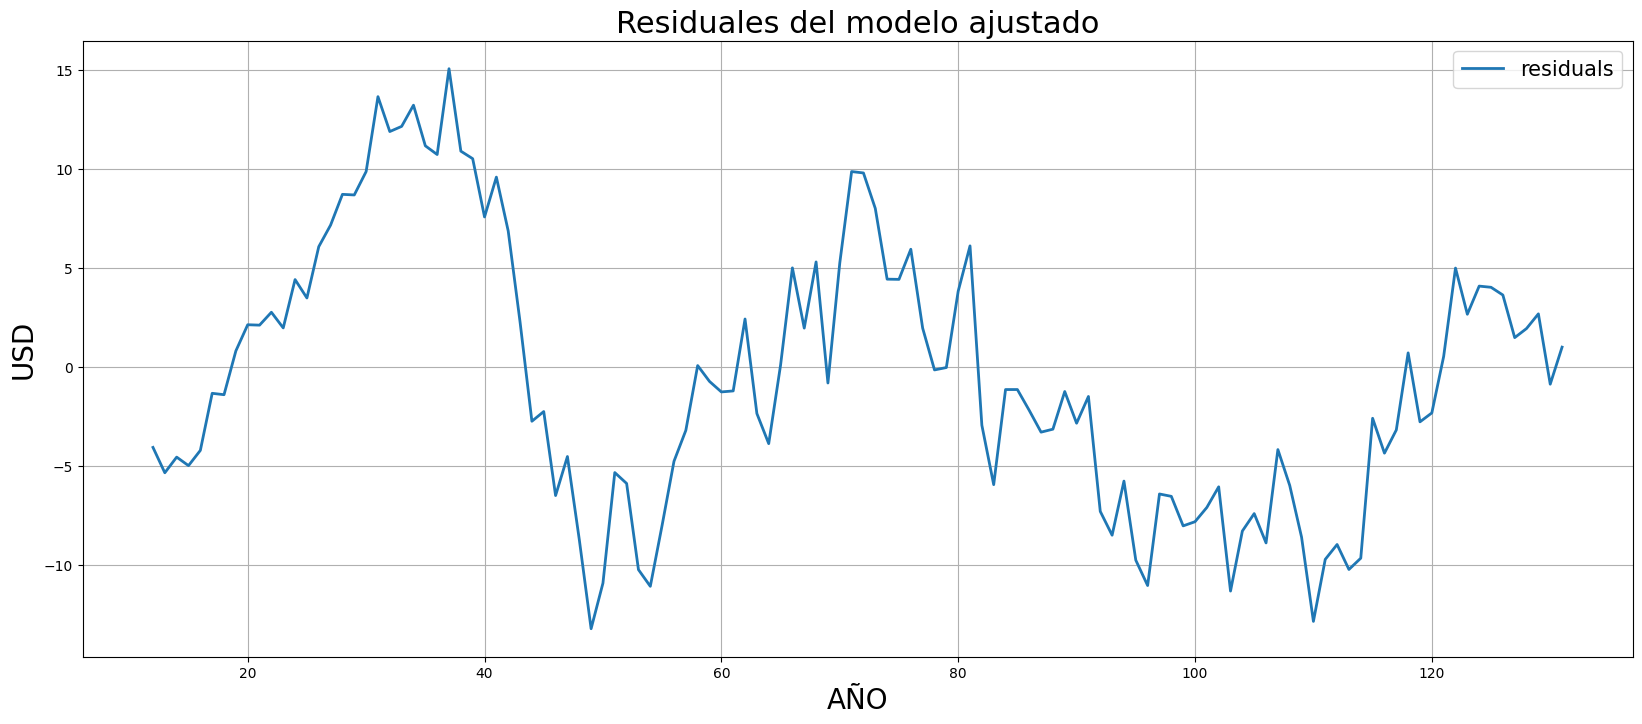

In [78]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
augment_df['residuals'].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ajustado', fontsize=22)
ax.set_ylabel('USD', fontsize=20)
ax.set_xlabel('AÑO', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

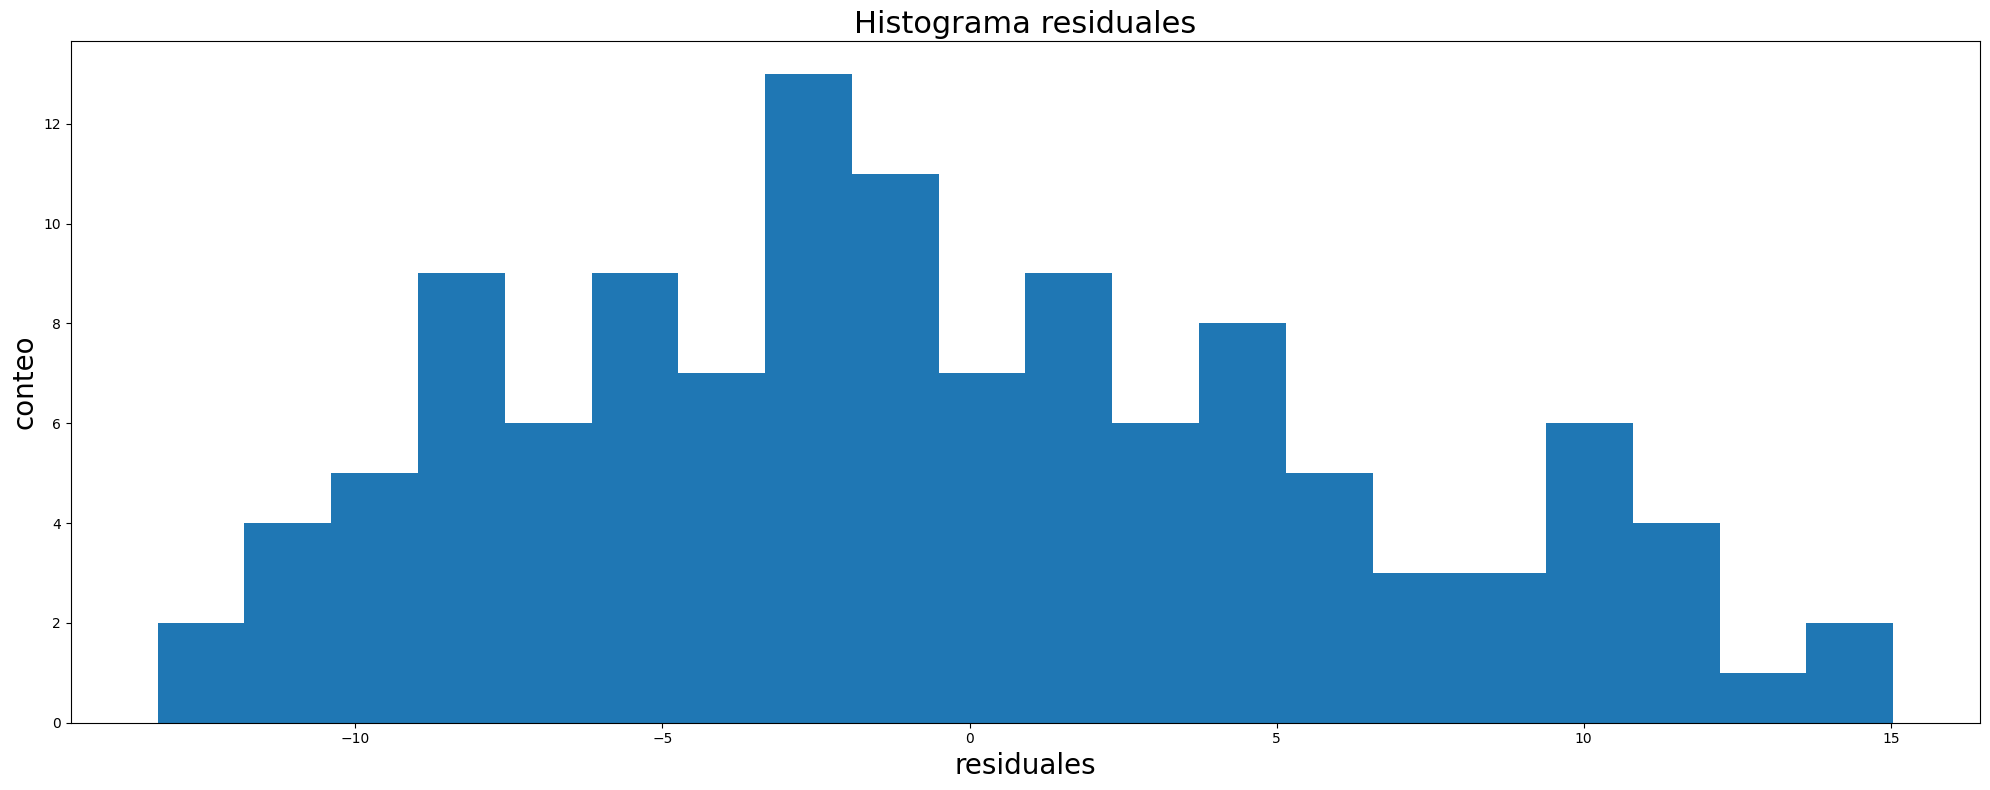

In [79]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(augment_df["residuals"], bins = 20)

# Specify graph features:
axs.set_title('Histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

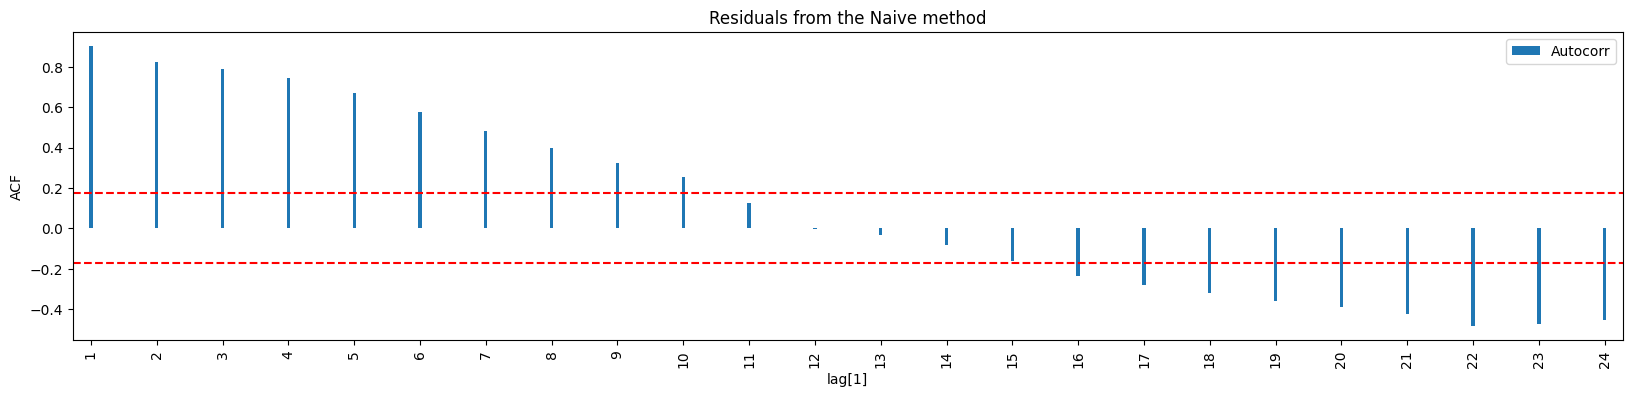

In [80]:
import math

ticker_data = augment_df["residuals"]
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(augment_df['residuals'])
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

## Regresión Lineal

In [80]:
import statsmodels.api as sm


In [99]:

data = pd.DataFrame(test.values, columns=['Y'], index=test.index)
data.head()


,Y
2022-01-31,10.77
2022-02-28,12.58
2022-03-31,11.91
2022-04-30,12.28
2022-05-31,14.25


In [100]:
getattr(data.index, 'month_name')


<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', freq='ME')>

In [101]:
data['mes'] = data.index.month_name()
data


,Y,mes
2022-01-31,10.77,January
2022-02-28,12.58,February
2022-03-31,11.91,March
2022-04-30,12.28,April
2022-05-31,14.25,May
2022-06-30,11.00,June
2022-07-31,10.05,July
2022-08-31,11.13,August
2022-09-30,10.04,September
2022-10-31,11.50,October


In [102]:

data = pd.get_dummies(data, columns=['mes'], prefix="", prefix_sep="", drop_first=True, dtype=float)
data

,Y,August,December,February,January,July,June,March,May,November,October,September
2022-01-31,10.77,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-28,12.58,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-31,11.91,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2022-04-30,12.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-31,14.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2022-06-30,11.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-07-31,10.05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-31,11.13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-30,10.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-10-31,11.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [103]:
Fecha_2020 = pd.Series(data = [1], index=pd.to_datetime(["2020-03-01"]), name='2020_outlier')


In [104]:
Fecha_2020


,2020_outlier
2020-03-01,1


In [106]:
data = data.join(Fecha_2020, lsuffix='_caller', rsuffix='_other').fillna(0) # add suffixes to distinguish between columns with the same name


In [107]:
data["2020":"2020"]


,Y,August,December,February,January,July,June,March,May,November,October,September,2020_outlier


In [108]:
data['lag1'] = data['Y'].shift(1)
data['lag2'] = data['Y'].shift(2)
data['lag3'] = data['Y'].shift(3)
data['lag4'] = data['Y'].shift(4)
data['lag5'] = data['Y'].shift(5)
data['lag6'] = data['Y'].shift(6)
data['lag7'] = data['Y'].shift(7)
data['lag8'] = data['Y'].shift(8)
data['lag9'] = data['Y'].shift(9)
data['lag10'] = data['Y'].shift(10)
data['lag11'] = data['Y'].shift(11)
data['lag12'] = data['Y'].shift(12)


In [110]:
data.head(13)

,Y,August,December,February,January,July,June,March,May,November,...,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
2022-01-31,10.77,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-28,12.58,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-31,11.91,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-30,12.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,14.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,12.58,10.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,11.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.91,12.58,10.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-31,10.05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12.28,11.91,12.58,10.77,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31,11.13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.25,12.28,11.91,12.58,10.77,NaN,NaN,NaN,NaN,NaN
2022-09-30,10.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.00,14.25,12.28,11.91,12.58,10.77,NaN,NaN,NaN,NaN
2022-10-31,11.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.05,11.00,14.25,12.28,11.91,12.58,10.77,NaN,NaN,NaN


In [111]:

# Check for infinite values
print(np.isinf(data).any())

# Check for NaNs
print(np.isnan(data).any())

# Replace infinite values with NaNs
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs
data.dropna(inplace=True)

# Now try running the regression again
print(sm.OLS(data['Y'], data.drop(columns=['Y'])).fit().summary())

Y               False
August          False
December        False
February        False
January         False
July            False
June            False
March           False
May             False
November        False
October         False
September       False
2020_outlier    False
lag1            False
lag2            False
lag3            False
lag4            False
lag5            False
lag6            False
lag7            False
lag8            False
lag9            False
lag10           False
lag11           False
lag12           False
dtype: bool
Y               False
August          False
December        False
February        False
January         False
July            False
June            False
March           False
May             False
November        False
October         False
September       False
2020_outlier    False
lag1             True
lag2             True
lag3             True
lag4             True
lag5             True
lag6             True
lag7             Tru

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


In [112]:
from sklearn.linear_model import LinearRegression


In [113]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])


1.0

In [114]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).coef_


array([-0.3759987 ,  0.02241738, -0.09913446, -0.15603204, -0.76897807,
       -0.04639151, -0.16685936,  0.27940326,  0.03585163, -0.07032984,
        1.39467174,  0.        ,  0.4984243 ,  0.10360675, -0.65562225,
       -0.38391525, -0.57375086, -0.94271149, -0.24067607, -0.16061433,
       -0.01939003, -0.32822493,  0.19279532, -0.19225967])

In [115]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).intercept_


40.73222858453583

In [116]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).feature_names_in_


array(['August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', '2020_outlier',
       'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8',
       'lag9', 'lag10', 'lag11', 'lag12'], dtype=object)

In [117]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).n_features_in_


24

In [118]:
errors = LinearRegression().fit(data.drop(columns=['Y']), data['Y']).predict(data.drop(columns=['Y'])) - data['Y']


In [119]:
errors.head()


,Y
2023-01-31,-3.552714e-15
2023-02-28,0.000000e+00
2023-03-31,-3.552714e-15
2023-04-30,-3.552714e-15
2023-05-31,-3.552714e-15


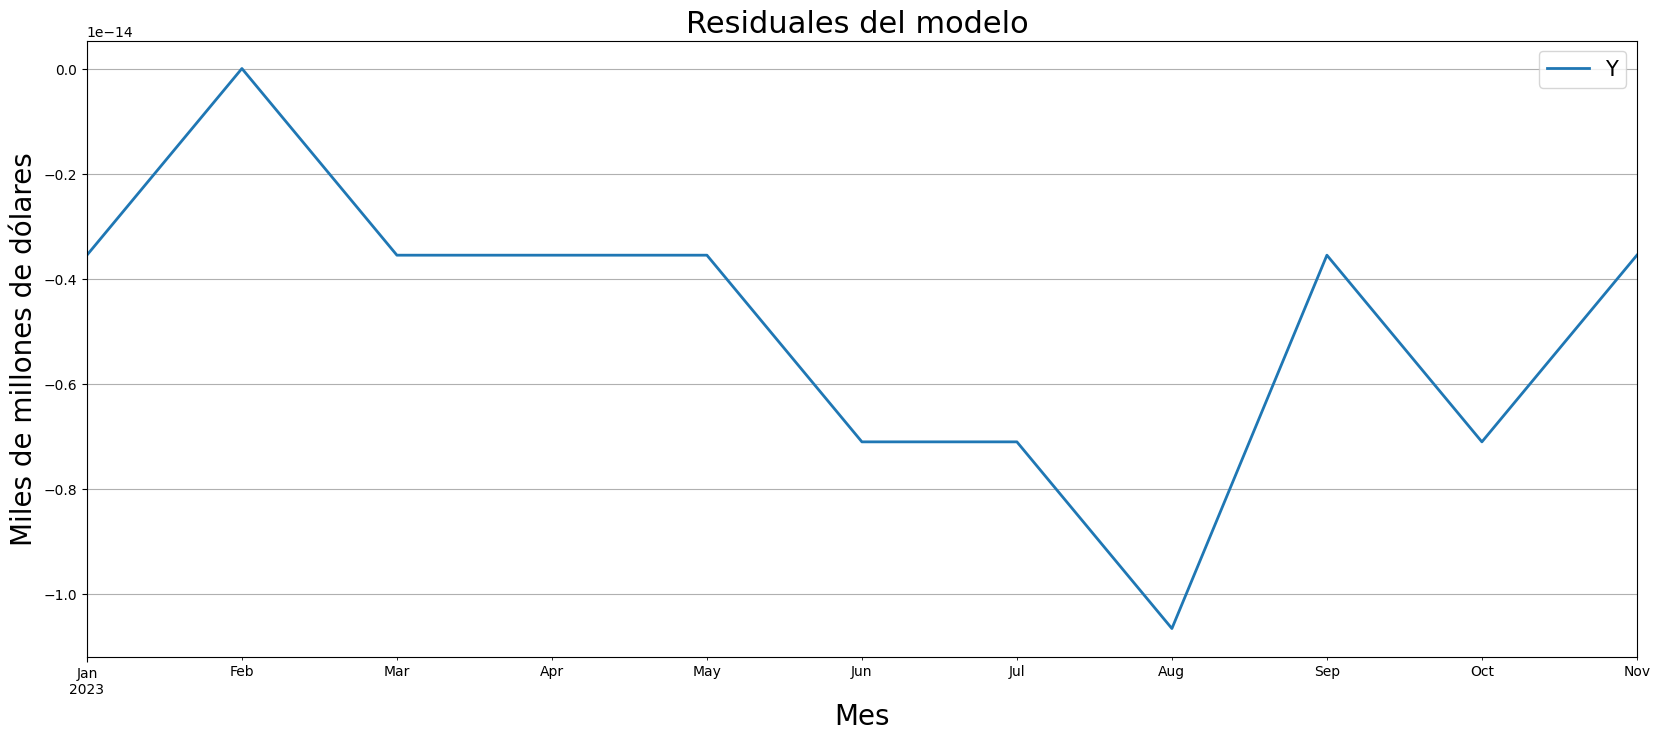

In [120]:


fig, ax = plt.subplots(1, 1, figsize = (20, 8))
errors.plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ', fontsize=22)
ax.set_ylabel('Miles de millones de dólares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()


In [121]:
errors.mean()


-4.844609562000683e-15

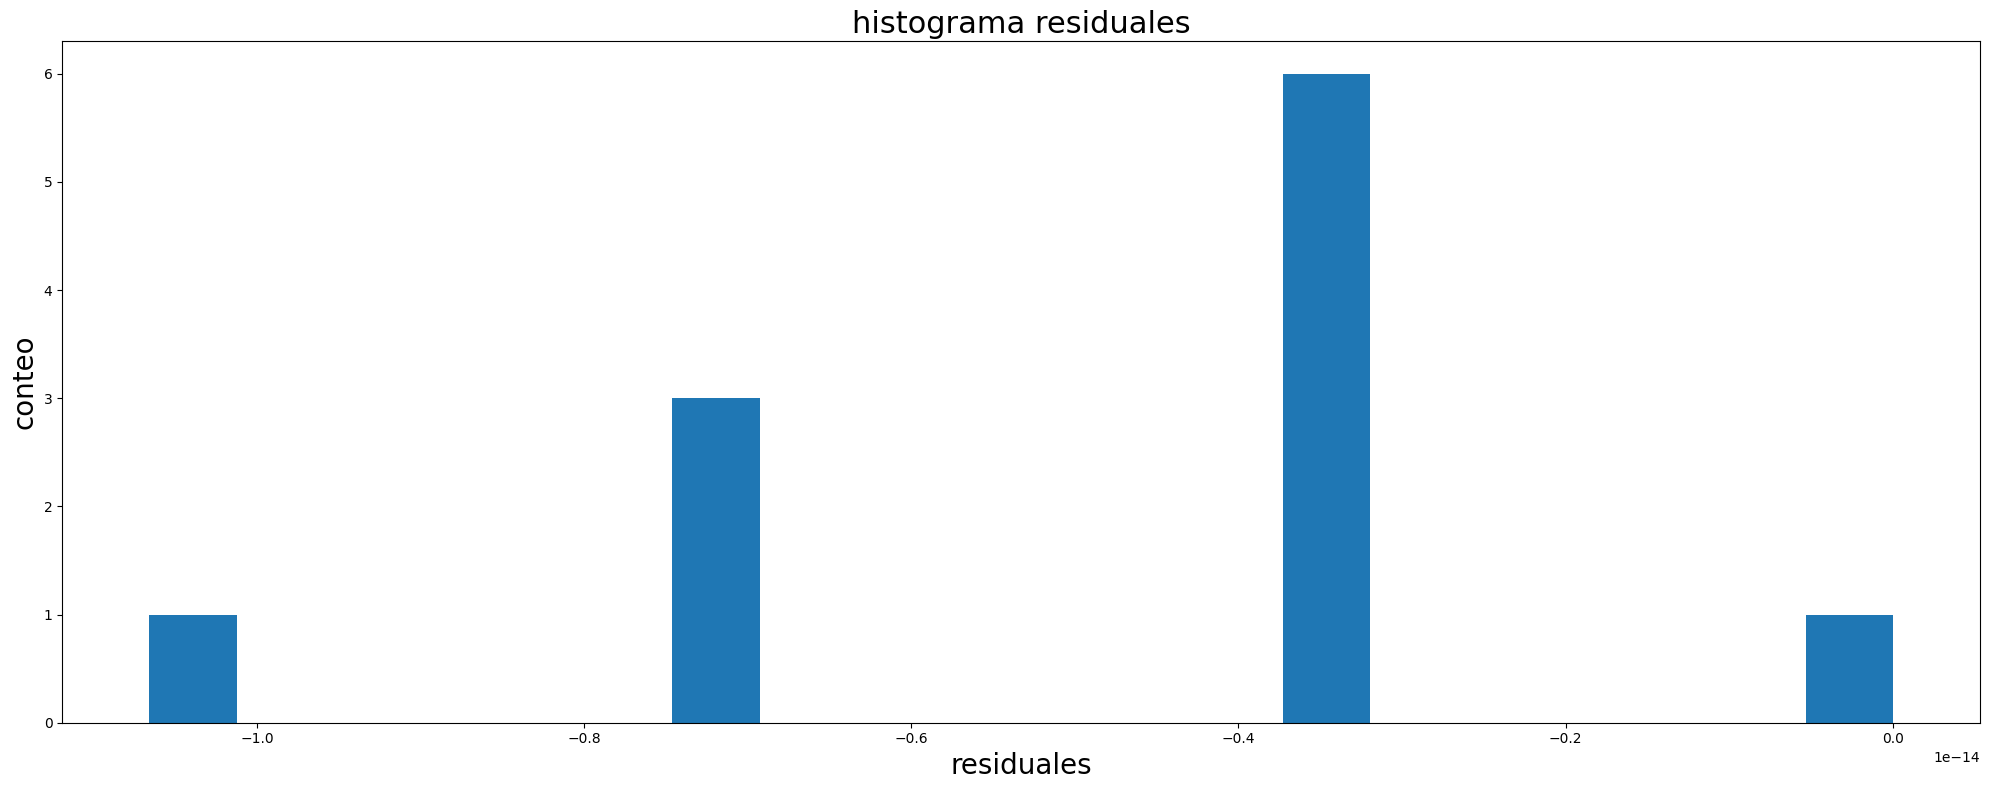

In [122]:


# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(errors, bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Text(0, 0.5, 'ACF')

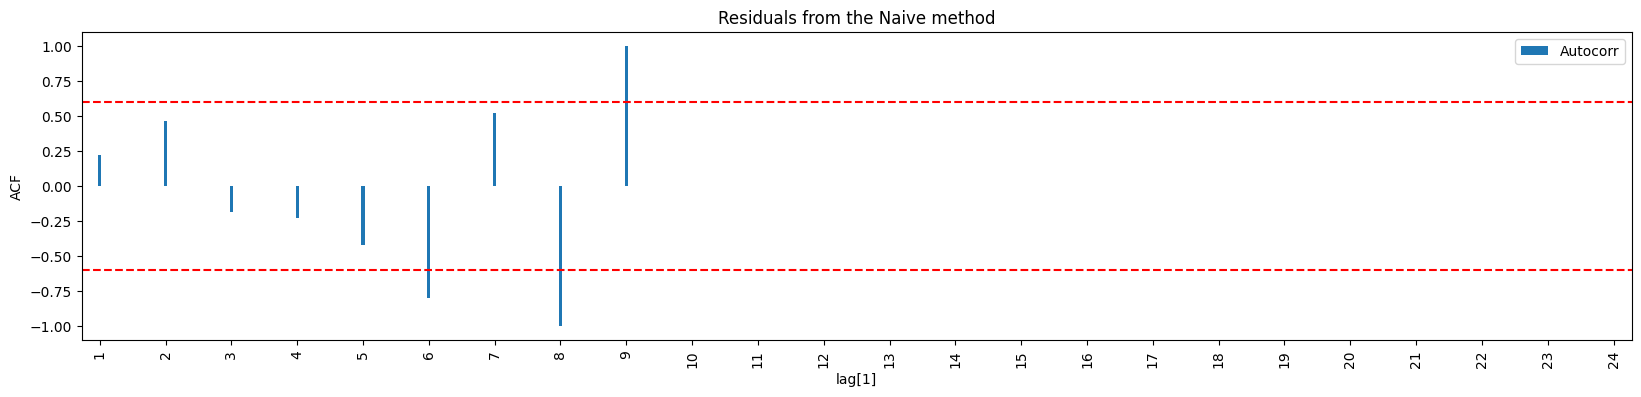

In [123]:

import math

ticker_data = errors
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(errors)
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

In [124]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])


1.0

In [125]:
data_copy = data.copy()


In [126]:
LinearRegression().fit(data_copy.drop(columns=['Y']), data_copy['Y']).score(data_copy.drop(columns=['Y']), data_copy['Y'])



1.0

In [127]:
data_copy.head()


,Y,August,December,February,January,July,June,March,May,November,...,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
2023-01-31,11.45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11.50,10.04,11.13,10.05,11.00,14.25,12.28,11.91,12.58,10.77
2023-02-28,11.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.05,11.50,10.04,11.13,10.05,11.00,14.25,12.28,11.91,12.58
2023-03-31,10.31,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,11.46,11.05,11.50,10.04,11.13,10.05,11.00,14.25,12.28,11.91
2023-04-30,10.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.45,11.46,11.05,11.50,10.04,11.13,10.05,11.00,14.25,12.28
2023-05-31,10.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,11.00,11.45,11.46,11.05,11.50,10.04,11.13,10.05,11.00,14.25


In [128]:


LinearRegression().fit(data_copy.drop(columns=['Y']),
                       data_copy['Y']).score(data_copy.drop(
                                        columns=['Y']),
                                        data_copy['Y'])

1.0

In [129]:
predict = LinearRegression().fit(data_copy.drop(columns=['Y']),
                                data_copy['Y']).predict(data_copy.drop(
                                            columns=['Y']))


In [130]:


errors = predict - data_copy['Y']

In [135]:
from scipy.special import inv_boxcox
import scipy as sp


In [134]:
lambda_val = sp.stats.boxcox(data['Y'])[1]


In [136]:
inverted_predictions = inv_boxcox(predict, lambda_val)


In [137]:
inverted_predictions[:12]


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [138]:
errors = inverted_predictions - data['Y']


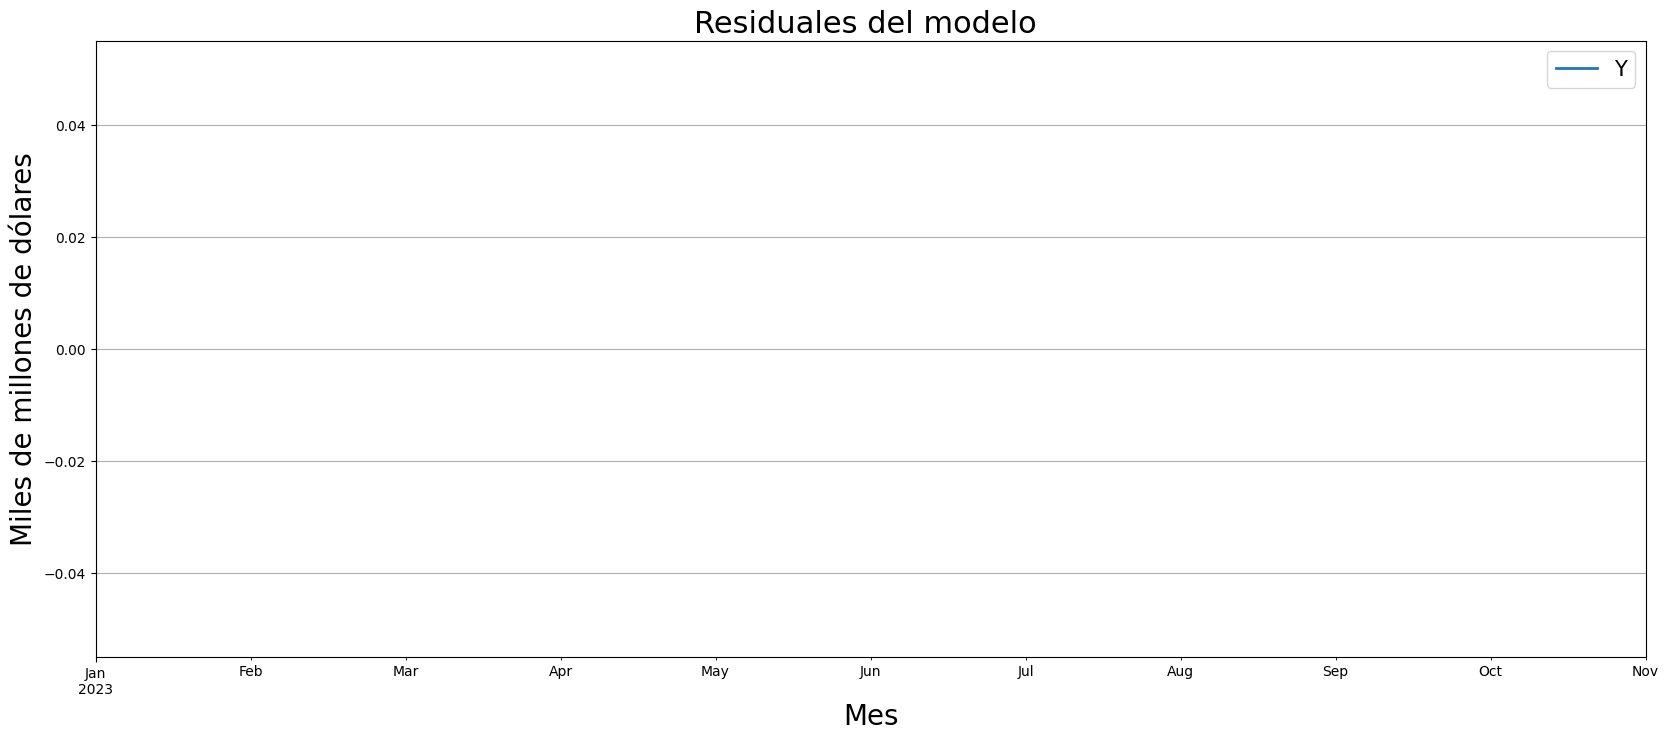

In [139]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
errors.plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ', fontsize=22)
ax.set_ylabel('Miles de millones de dólares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()



/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

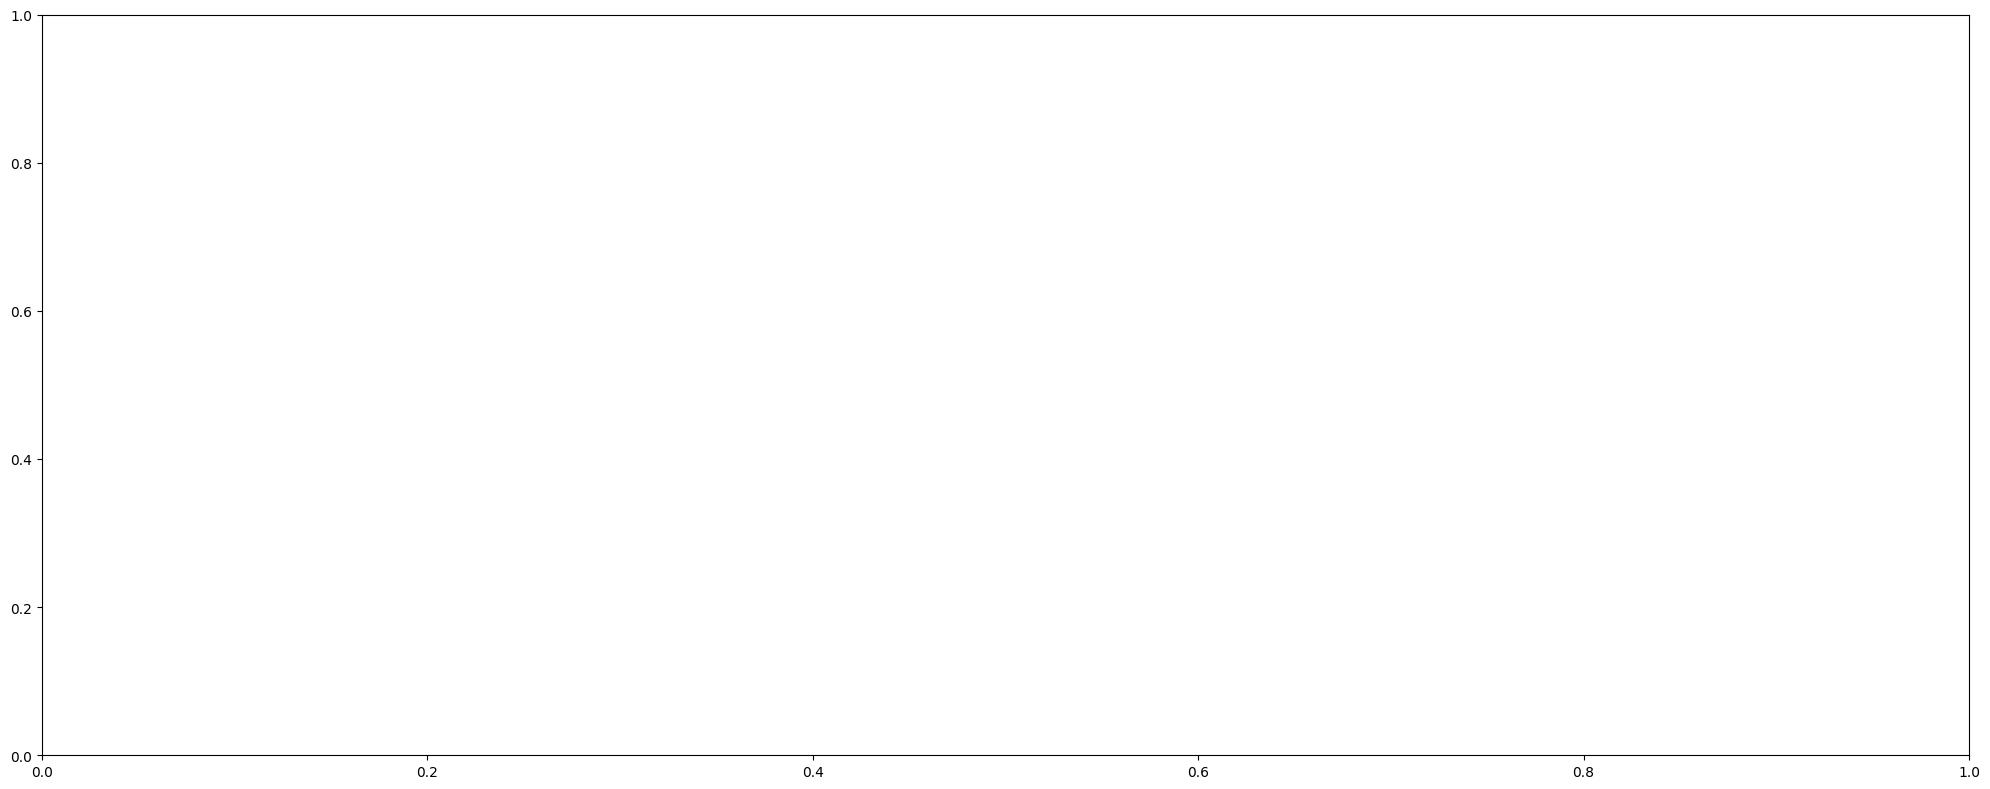

In [140]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(errors, bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

In [140]:
import math

ticker_data = errors
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(errors)
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the OLS method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")


In [141]:
from statsmodels.tsa.deterministic import Fourier


In [142]:

fourier_gen = Fourier(12, order=4)
fourier_data = fourier_gen.in_sample(data.index)

<Axes: >

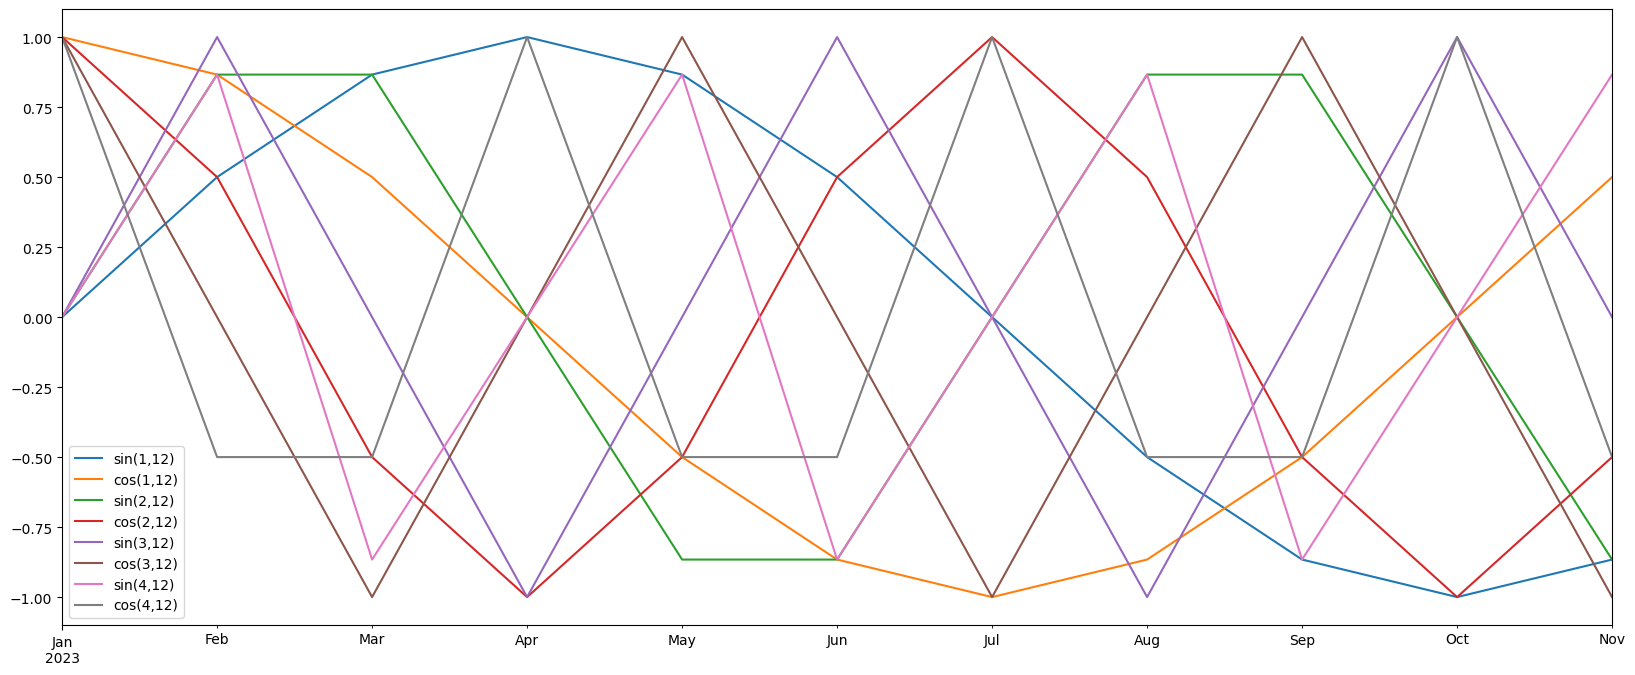

In [143]:
fourier_data.plot(figsize=(20, 8))


<Axes: >

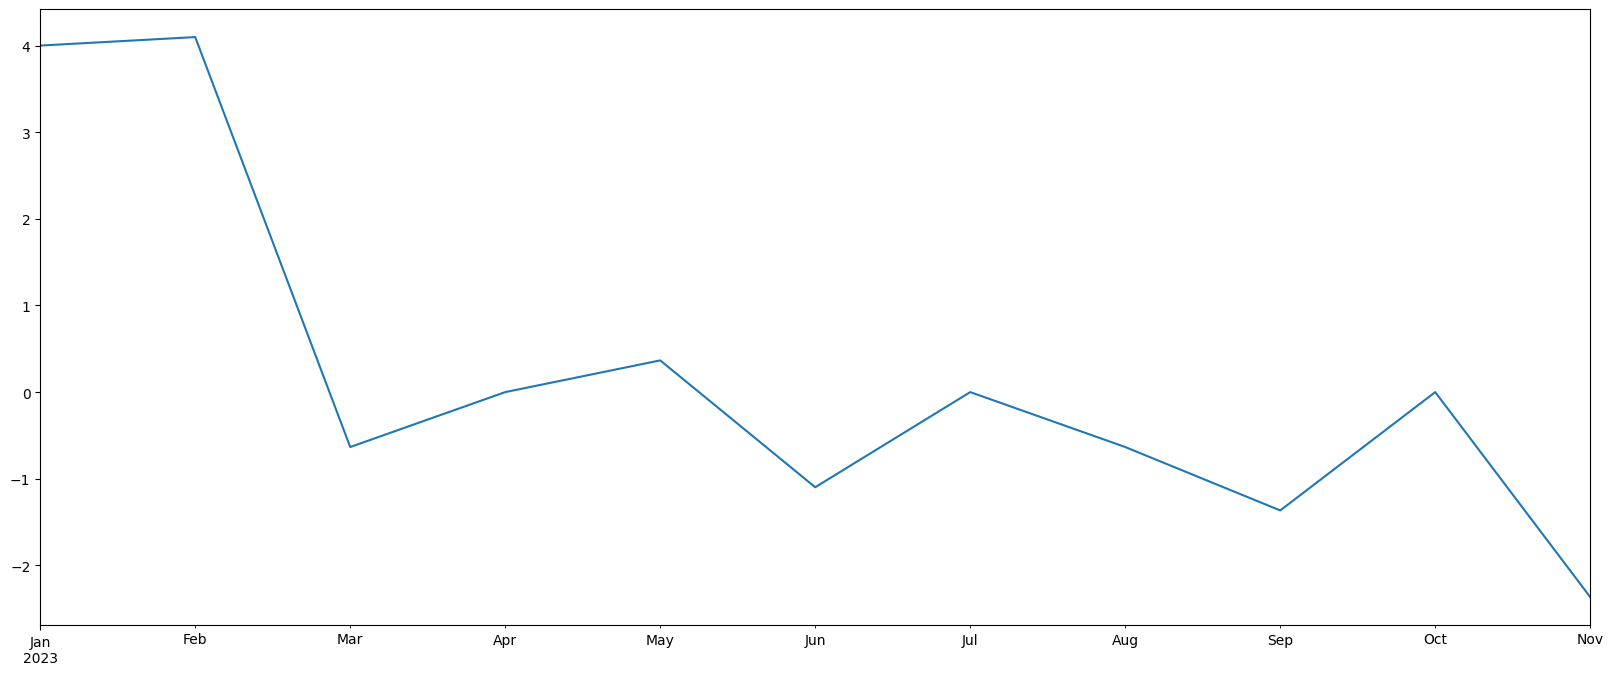

In [144]:
fourier_data.sum(1).plot(figsize=(20, 8))



In [145]:
data = data.join(fourier_data)


In [146]:
data.columns


Index(['Y', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', '2020_outlier',
       'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9',
       'lag10', 'lag11', 'lag12', 'sin(1,12)', 'cos(1,12)', 'sin(2,12)',
       'cos(2,12)', 'sin(3,12)', 'cos(3,12)', 'sin(4,12)', 'cos(4,12)'],
      dtype='object')

In [147]:
LinearRegression().fit(data.drop(columns=['Y']),
                       data['Y']).score(data.drop(
                                        columns=['Y']),
                                        data['Y'])


1.0

In [148]:
predict = LinearRegression().fit(data.drop(columns=['Y']),
                                data['Y']).predict(data.drop(
                                            columns=['Y']))


In [149]:
errors = predict - data['Y']


In [150]:
predict = pd.Series(predict, index=errors.index)


In [151]:
errors.sum()


2.1316282072803006e-14

In [152]:
errors.mean()


1.937843824800273e-15

In [153]:
training_mask = data.index > '2022-01-01'
test = data[training_mask]
train = data[~training_mask]


In [154]:
test.shape, train.shape


((11, 33), (0, 33))

In [156]:
errors1 = predict - data['Y']
errors1


,0
2023-01-31,3.552714e-15
2023-02-28,0.000000e+00
2023-03-31,0.000000e+00
2023-04-30,3.552714e-15
2023-05-31,0.000000e+00
2023-06-30,0.000000e+00
2023-07-31,3.552714e-15
2023-08-31,3.552714e-15
2023-09-30,3.552714e-15
2023-10-31,0.000000e+00


In [157]:

mae = np.mean(abs(errors))
mae

1.937843824800273e-15

In [158]:

rmse = np.sqrt(np.mean(errors**2))
rmse

2.6238529424773432e-15

In [159]:
from sklearn.metrics import mean_absolute_percentage_error


In [160]:
mape = mean_absolute_percentage_error(data['Y'], predict)
mape


1.6398266349303864e-16

<Axes: >

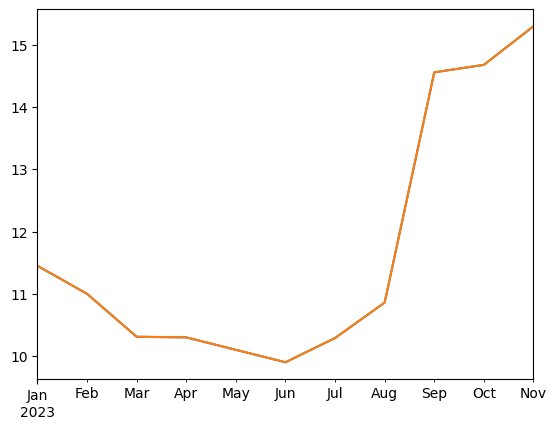

In [164]:
data['Y'].plot()
predict.plot()

In [81]:
import statsmodels

In [82]:
ljung_box = statsmodels.stats.diagnostic.acorr_ljungbox(test_df, lags=12, model_df=0)
ljung_box.tail(1)

,lb_stat,lb_pvalue
12,79.662988,4.785510e-12


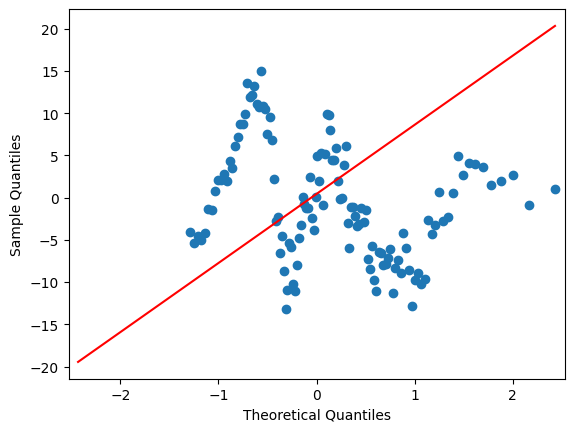

In [83]:
fig = statsmodels.api.qqplot(augment_df[['residuals']].values, line='q')
plt.show()

## **Gas Natural vs Periodo**

***Natural Gas Services Group, Inc. (NGS)***

Proporciona equipos y servicios de compresión de gas natural a la industria energética de los Estados Unidos. Diseña y fabrica, opera, alquila y mantiene compresores de gas natural para instalaciones de plantas y producción de petróleo y gas natural.

Proporciona servicios posventa para su negocio de venta de compresores y antorchas; y programa de intercambio y reconstrucción de compresores de tornillo de pequeña potencia. Comercializa sus productos a empresas de exploración y producción que utilizan unidades compresoras para aplicaciones de levantamiento artificial; y empresas de exploración y producción de petróleo y gas natural.


__

***Marathon Petroleum Corporation (MPC)***

Opera como una empresa integrada de energía downstream principalmente en Estados Unidos. La compañía opera a través de los segmentos de Refinación y Marketing y Midstream. El segmento de Refinación y Comercialización refina petróleo crudo y otras materias primas en sus refinerías en las regiones de la Costa del Golfo, el Continente Medio y la Costa Oeste de los Estados Unidos; y compra productos refinados y etanol para reventa y distribuye productos refinados, incluido diésel renovable, a través de servicios de transporte, almacenamiento, distribución y comercialización.


In [90]:
!pip install yfinance
import yfinance as yf
import pandas as pd

dataG = 'MPC'
ticker = yf.Ticker(dataG)
mpc = ticker.history(start='2011-01-01', end='2023-12-01', interval='1mo')['Close']
# The error is in the next line.
# Instead of using hist.index which has a different size,
# We will resample mpc to have the same date range as hist but keep its original data
mpc = mpc.resample('M').last()  # Resample to monthly frequency and take the last value
# If you need to align mpc and hist, consider using the following:
# mpc = mpc[mpc.index.isin(hist.index)] # Keep only dates present in both
# hist = hist[hist.index.isin(mpc.index)] # Keep only dates present in both

mpc.index = mpc.index.strftime('%Y-%m-%d')
mpc.index = pd.to_datetime(mpc.index)


<ipython-input-90-9a5d64e985fe>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mpc = mpc.resample('M').last()  # Resample to monthly frequency and take the last value


In [91]:
mpc

,Close
Date,
2011-07-31,14.854148
2011-08-31,12.571244
2011-09-30,9.228447
2011-10-31,12.243209
2011-11-30,11.387207
...,...
2023-07-31,129.738998
2023-08-31,139.248505
2023-09-30,148.356201


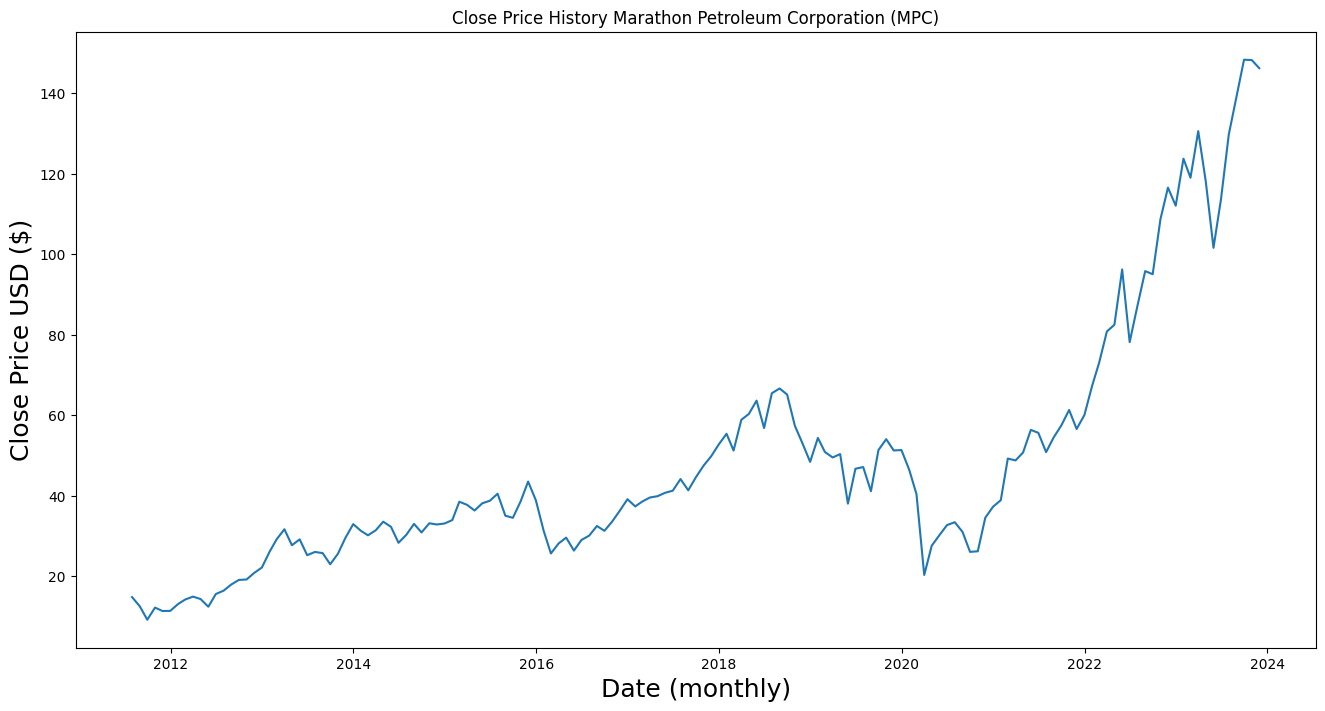

In [92]:
plt.figure(figsize=(16,8))
plt.title('Close Price History Marathon Petroleum Corporation (MPC)')
plt.plot(mpc)
plt.xlabel('Date (monthly)', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [93]:
mpc.describe()

,Close
count,149.000000
mean,48.056134
std,30.669439
min,9.228447
25%,29.622252
50%,38.780746
75%,55.423344
max,148.356201


[*********************100%***********************]  2 of 2 completed


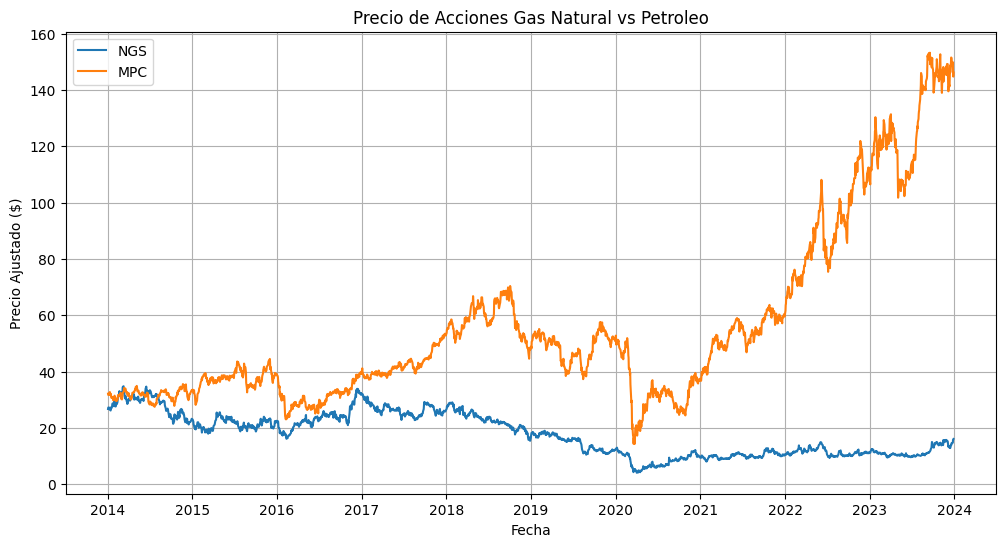

In [94]:


# Definir las acciones que quieres graficar
acciones = ['NGS', 'MPC']  # Apple y Microsoft

# Descargar los datos históricos de precios
data = yf.download(acciones, start='2014-01-01', end='2024-01-01')['Adj Close']

# Graficar los precios
plt.figure(figsize=(12, 6))
for accion in acciones:
    plt.plot(data.index, data[accion], label=accion)

plt.title('Precio de Acciones Gas Natural vs Petroleo')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado ($)')
plt.legend()
plt.grid()
plt.show()


In [95]:
data.head()

Ticker,MPC,NGS
Date,,
2014-01-02 00:00:00+00:00,32.172531,26.73
2014-01-03 00:00:00+00:00,31.733873,27.24
2014-01-06 00:00:00+00:00,31.895670,27.27
2014-01-07 00:00:00+00:00,31.999937,27.02
2014-01-08 00:00:00+00:00,31.884880,26.77


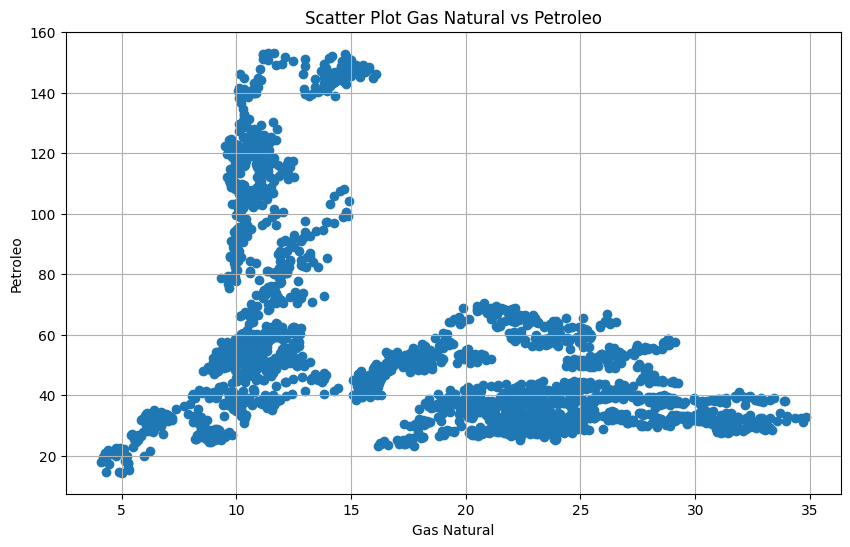

In [96]:
# prompt: create a scatter plot with data dataframe

plt.figure(figsize=(10, 6))
plt.scatter(data['NGS'], data['MPC'])
plt.xlabel('Gas Natural')
plt.ylabel('Petroleo')
plt.title('Scatter Plot Gas Natural vs Petroleo')
plt.grid(True)
plt.show()


#### Concluimos con esta gráfica que mientras el gas natural aumenta de 0 - 15 los valores de el petroleo varian desde 20 - 148, podemos observar que el gas natural aumenta de 15 - 35 los valores de el petroleo se comportan de manera muy diferente a la pimera parte de la gráfica pues ahora varian desde 20 - 75.

In [97]:
data.corr()

Ticker,MPC,NGS
Ticker,,
MPC,1.000000,-0.394712
NGS,-0.394712,1.000000


#### Con este dato podemos observar la moderada relación que tienen estas dos series de datos, como es que basicamente no nos ayuda una variable a predecir la otra. Por otro lado, que la relación sea negativa indica que mientras una variable aumenta, la otra tiende a disminuir. Es decir, hay una relación inversa entre ambas. De acuerdo a este contexto mientras el precio del **petroleo** aumenta el **gas natural** disminuye.

# **Correlación de las series**
 #### El petróleo y el gas natural son combustibles fósiles que se utilizan en la vida cotidiana y son fuentes de energía no renovables. El sector energético es el conjunto de actividades económicas relacionadas con la producción, distribución y consumo de energía. A menudo, los precios del gas natural y del petróleo están correlacionados debido a su naturaleza como combustibles fósiles. Cambios en la oferta y la demanda de uno pueden influir en el otro.

 #### Comparar estas dos series no solo es relevante desde un punto de vista financiero, sino tambien puede ser relevante en investigaciones sobre la sostenibilidad y el impacto ambiental de la extracción y uso de combustibles fósiles. Pero desde las finanzas, los inversores y empresas pueden utilizar la relación entre ambas series para desarrollar estrategias de cobertura que minimicen el riesgo financiero.

 #### El comportamiento de estas dos series varia por diferentes factores. Como lo es la demanda de gas natural puede aumentar en invierno para calefacción, mientras que la demanda de petróleo puede verse afectada por factores estacionales. Comparar ambas series permite identificar estos patrones.

 #### En resumen, el análisis comparativo de los precios del gas natural y del petróleo proporciona una comprensión más profunda de la dinámica del mercado energético, ayudando a tomar decisiones informadas a nivel empresarial, político y académico. Esta información puede ser crucial para la planificación y la gestión estratégica en un entorno energético en constante cambio.

# **FUENTES**
 (¿De dónde sacas tus datos?)


Jgranados. (2024, 22 febrero). ¿Por qué sube el precio del gas y cómo hacerle frente? Naturgy. https://www.naturgy.com.mx/blog/hogar/por-que-sube-el-precio-del-gas-y-como-hacerle-frente/

Hexn. (2024, 11 agosto). Correlacion entre los precios del petroleo y del gas natural. Hexn. https://hexn.io/es/blog/correlacion-entre-los-precios-del-petroleo-y-del-gas-natural-1094

Origen y características del gas natural | Aprende con Energía. (s. f.). https://www.aprendeconenergia.cl/fuentes-de-energia/origen-y-caracteristicas-del-gas-natural

Montaner, D. (2021, 26 abril). ¿Qué significa Platykurtic? CriptoMundo. https://criptomundo.com/que-significa-platykurtic/

Yahoo is part of the Yahoo family of brands. (s. f.-b). https://finance.yahoo.com/quote/MPC/profile/

Yahoo is part of the Yahoo family of brands. (s. f.). https://finance.yahoo.com/quote/NGS/profile/

World Bank Open Data. (s. f.). World Bank Open Data. https://data.worldbank.org/
